In [791]:
# 구간별 유니버스 Z-score
# 구간별 국가별 Z-score
# 구간별 섹터별 F3 결측치 처리
# 구간별 섹터별 F1 극값 처리
# 위 Z-score 의 국가별 공분산행렬
# 변수의 MA
# 변수의 WMA
# 변수의 EMA
# MA, WMA, EMA 히스토그램
# 팩터와 수익률 Scatter Plot

# F1 구간/사이즈별 분위 나누기
# F1_Q별 수익률 계산: 단순평균 & 시총 가중평균
# F1_Q별 수익률 Geometric linking

In [1020]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

------

In [1021]:
# 구간별 유니버스 Z-score

df = pd.read_csv('CS_TS_Sample.csv')
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201


In [1022]:
# 구간별 F1 mean

result_mean = (
    df
    .groupby(['Periods'])
    ['F1'].mean()
    .to_frame()
)

result_mean = result_mean.rename({
    'F1':'F1_mean'}
    , axis = 1 
    )

result_mean[:5]

,F1_mean
Periods,
1/29/2021,0.696523
1/31/2018,0.713284
1/31/2019,0.900219
1/31/2020,0.882770
1/31/2022,0.698084


In [1023]:
merged_df = pd.merge(df, result_mean, on = ['Periods'], how = 'left')
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392
...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955


In [1024]:
# 구간별 F1 std

result_std = (
    df
    .groupby(['Periods'])
    ['F1'].std()
    .to_frame()
)

result_std = result_std.rename({
    'F1':'F1_std'}
    , axis = 1 
    )

result_std[:5]

,F1_std
Periods,
1/29/2021,0.927034
1/31/2018,0.817556
1/31/2019,1.024249
1/31/2020,1.131457
1/31/2022,0.955789


In [1025]:
merged_df = pd.merge(merged_df, result_std, on = ['Periods'], how = 'left')
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281


In [1026]:
merged_df['F1_Z'] = (merged_df['F1'] - merged_df['F1_mean']) / merged_df['F1_std']
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std,F1_Z
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912,-0.111256
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556,-0.084041
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049,-0.131345
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903,-0.161201
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186,-0.180267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457,2.518973
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180,2.745041
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881,2.634282
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281,2.379773


-------------

In [1027]:
# 구간별 국가별 Z-score

# 구간별 국가별 F1 mean
result_ctr_mean = (
    merged_df
    .groupby(['Periods', 'Country'])
    ['F1'].mean()
    .to_frame()
)

result_ctr_mean = result_ctr_mean.rename(
    {'F1':'F1_ctr_mean'}
    , axis = 1
)

result_ctr_mean

F1_ctr_mean
Periods   Country                    
1/29/2021 Australia          0.498816
          Austria            1.112427
          Belgium            0.594859
          Canada             0.661857
          Denmark            0.360584
...                               ...
9/30/2021 Spain              0.856543
          Sweden             0.482142
          Switzerland        0.517243
          United Kingdom     0.886476
          United States      0.465221

[1202 rows x 1 columns]

In [1028]:
merged_df = pd.merge(merged_df, result_ctr_mean, on = ['Periods', 'Country'], how = 'left')
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std,F1_Z,F1_ctr_mean
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912,-0.111256,0.574141
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556,-0.084041,0.549617
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049,-0.131345,0.587118
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903,-0.161201,0.605628
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186,-0.180267,0.607012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457,2.518973,0.625227
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180,2.745041,0.706825
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881,2.634282,0.976796
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281,2.379773,0.838615


In [1029]:
# 구간별 국가별 F1 std
result_ctr_std = (
    merged_df
    .groupby(['Periods', 'Country'])
    ['F1'].std()
    .to_frame()
)

result_ctr_std = result_ctr_std.rename(
    {'F1':'F1_ctr_std'}
    , axis = 1
)

result_ctr_std

F1_ctr_std
Periods   Country                   
1/29/2021 Australia         0.530465
          Austria           0.676595
          Belgium           0.519550
          Canada            0.689146
          Denmark           0.348526
...                              ...
9/30/2021 Spain             1.024561
          Sweden            0.525458
          Switzerland       0.576646
          United Kingdom    0.998231
          United States     0.796493

[1202 rows x 1 columns]

In [1030]:
merged_df = pd.merge(merged_df, result_ctr_std, on = ['Periods', 'Country'], how = 'left')
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std,F1_Z,F1_ctr_mean,F1_ctr_std
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912,-0.111256,0.574141,0.735029
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556,-0.084041,0.549617,0.680799
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049,-0.131345,0.587118,0.734498
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903,-0.161201,0.605628,0.778266
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186,-0.180267,0.607012,0.764424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457,2.518973,0.625227,0.930697
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180,2.745041,0.706825,1.021917
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881,2.634282,0.976796,1.389175
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281,2.379773,0.838615,1.209074


In [1031]:
merged_df['F1_ctr_Z'] = (merged_df['F1'] - merged_df['F1_ctr_mean']) / merged_df['F1_ctr_std']
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std,F1_Z,F1_ctr_mean,F1_ctr_std,F1_ctr_Z
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912,-0.111256,0.574141,0.735029,0.100022
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556,-0.084041,0.549617,0.680799,0.139482
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049,-0.131345,0.587118,0.734498,0.073239
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903,-0.161201,0.605628,0.778266,0.038128
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186,-0.180267,0.607012,0.764424,0.009357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457,2.518973,0.625227,0.930697,3.339061
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180,2.745041,0.706825,1.021917,3.668906
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881,2.634282,0.976796,1.389175,3.552164
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281,2.379773,0.838615,1.209074,3.501770


---------

In [1032]:
# 구간별 섹터별 F3 결측치 처리 (**새로운 칼럼을 생성해줘야 함)

merged_df['F3_filled'] = merged_df['F3'].fillna(merged_df.groupby(['Periods', 'Sector'])['F3'].transform('mean'))
merged_df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,F1_mean,F1_std,F1_Z,F1_ctr_mean,F1_ctr_std,F1_ctr_Z,F3_filled
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.742552,0.852912,-0.111256,0.574141,0.735029,0.100022,65.062578
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.713284,0.817556,-0.084041,0.549617,0.680799,0.139482,65.049907
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.753349,0.856049,-0.131345,0.587118,0.734498,0.073239,64.889382
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.780045,0.897903,-0.161201,0.605628,0.778266,0.038128,65.676557
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.771392,0.872186,-0.180267,0.607012,0.764424,0.009357,65.277137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.882770,1.131457,2.518973,0.625227,0.930697,3.339061,5.862272
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.985916,1.264180,2.745041,0.706825,1.021917,3.668906,5.809201
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,1.301691,1.749881,2.634282,0.976796,1.389175,3.552164,5.809201
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,1.199955,1.627281,2.379773,0.838615,1.209074,3.501770,5.809201


---------------

<AxesSubplot:xlabel='F1', ylabel='Count'>

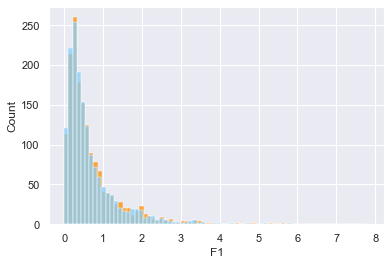

In [1033]:
# 구간별 섹터별 F1 극값 처리

# 분포검토
sns.histplot(x = merged_df[merged_df['Periods'] == '12/29/2017']['F1'], color='darkorange')
sns.histplot(x = merged_df[merged_df['Periods'] == '1/31/2018']['F1'], color='lightskyblue')

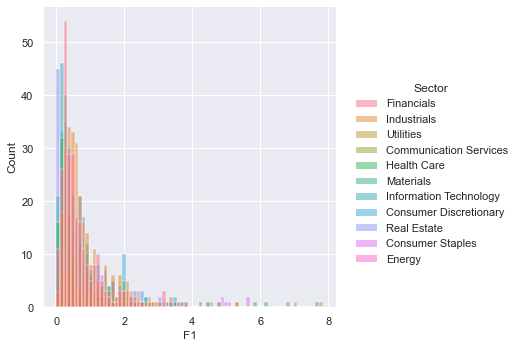

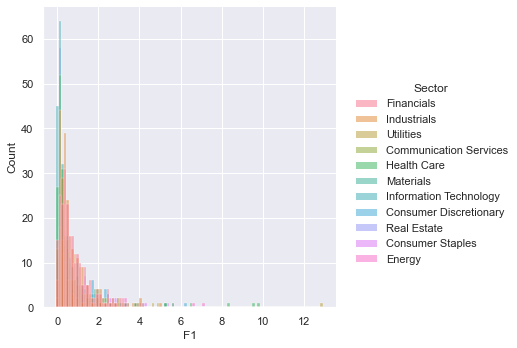

In [1034]:
sns.displot(x = merged_df[merged_df['Periods'] == '12/29/2017']['F1'], hue = merged_df['Sector'])
sns.displot(x = merged_df[merged_df['Periods'] == '12/31/2020']['F1'], hue = merged_df['Sector'])

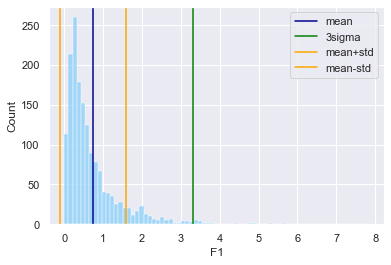

In [1035]:
date = '12/29/2017'

sns.histplot(x = merged_df[merged_df['Periods'] == date]['F1'], color='lightskyblue')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean(), color='darkblue', label='mean')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std(), color='green', label='3sigma')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean+std')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() - merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean-std')
plt.legend()

In [1036]:
# 구간별 +3 sigma 넘는 F1은 +3 sigma로 치환

merged_df.loc[
    merged_df['F1'] 
    > merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std(),
     'F1'] = merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std()

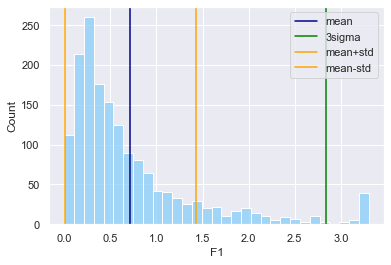

In [1037]:
sns.histplot(x = merged_df[merged_df['Periods'] == date]['F1'], color='lightskyblue')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean(), color='darkblue', label='mean')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std(), color='green', label='3sigma')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean+std')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() - merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean-std')
plt.legend()

In [1038]:
# Q. 위 작업을 몇차례 반복하려면?
n_iter = 3
for i in range(n_iter):
    print(i)
    merged_df.loc[
    merged_df['F1'] 
    > merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std(),
     'F1'] = merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std()

0
1
2


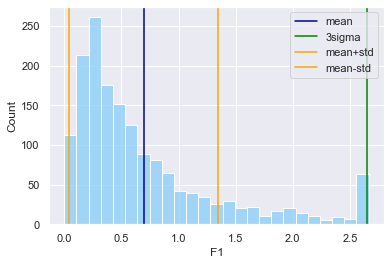

In [1120]:
sns.histplot(x = merged_df[merged_df['Periods'] == date]['F1'], color='lightskyblue')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean(), color='darkblue', label='mean')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + 3 * merged_df[merged_df['Periods'] == date]['F1'].std(), color='green', label='3sigma')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() + merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean+std')
plt.axvline(x = merged_df[merged_df['Periods'] == date]['F1'].mean() - merged_df[merged_df['Periods'] == date]['F1'].std(), color='orange', label='mean-std')
plt.legend()

--------

In [1039]:
# 위 Z-score 의 국가별 공분산행렬

# 전체 데이터 F1_Z 시총가중평균
def w_avg(df, values, weights) :
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

w_avg(merged_df, 'F1_Z', 'MCAP_USD')

-0.24188730563610292

In [1040]:
# 구간별 국가별 F1_Z 시총가중평균

F1_Z_wt_mean_by_ctr = merged_df.groupby(['Periods', 'Country']).apply(w_avg, 'F1_Z', 'MCAP_USD').to_frame('F1_Z_wt_mean_by_ctr').reset_index()
F1_Z_wt_mean_by_ctr

,Periods,Country,F1_Z_wt_mean_by_ctr
0,1/29/2021,Australia,-0.326038
1,1/29/2021,Austria,0.081672
2,1/29/2021,Belgium,-0.232260
3,1/29/2021,Canada,-0.156089
4,1/29/2021,Denmark,-0.413131
...,...,...,...
1197,9/30/2021,Spain,0.007003
1198,9/30/2021,Sweden,-0.309342
1199,9/30/2021,Switzerland,-0.352909
1200,9/30/2021,United Kingdom,0.143266


In [1041]:
# 피벗테이블로 변환해서 Country를 칼럼으로 이동

pivoted_df = F1_Z_wt_mean_by_ctr.pivot(index = 'Periods', columns = 'Country', values = 'F1_Z_wt_mean_by_ctr')
pivoted_df[:10]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,New Zealand,Norway,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
1/29/2021,-0.326038,0.081672,-0.232260,-0.156089,-0.413131,-0.138460,0.007032,0.302503,-0.383972,-0.275351,...,-0.602019,-0.124770,0.486002,-0.193363,NaN,0.032941,-0.372525,-0.373942,0.119301,-0.386246
1/31/2018,-0.292882,0.105970,-0.431908,-0.171542,-0.370164,-0.272486,0.091108,0.361008,-0.473062,-0.268095,...,-0.387309,-0.194258,0.610017,-0.255571,1.195663,-0.131640,-0.298133,-0.361833,0.077693,-0.351802
1/31/2019,-0.288828,0.134041,-0.356151,-0.200153,-0.365001,-0.300389,0.113344,0.474901,-0.523559,-0.139384,...,-0.511747,-0.156267,0.737031,-0.251131,NaN,-0.006471,-0.278975,-0.401481,0.130505,-0.402621
1/31/2020,-0.333457,0.194430,-0.335188,-0.208147,-0.379924,-0.286446,0.003311,0.318504,-0.435633,-0.144894,...,-0.533483,-0.113150,0.414760,-0.247239,NaN,-0.048282,-0.287079,-0.426341,0.097579,-0.403321
1/31/2022,-0.247432,0.088452,-0.138071,-0.198799,-0.336472,0.300950,-0.014656,0.480700,-0.373824,-0.160983,...,-0.492209,-0.136040,0.246410,-0.305470,NaN,0.059571,-0.296927,-0.372956,0.052421,-0.386259
10/29/2021,-0.282781,0.022543,-0.157322,-0.213522,-0.377265,0.172784,-0.011878,0.389130,-0.354408,-0.188973,...,-0.506197,-0.193993,0.135386,-0.378530,NaN,0.006444,-0.320420,-0.355323,0.102939,-0.383637
10/30/2020,-0.327707,0.331516,-0.252587,-0.205043,-0.440908,-0.261183,-0.012141,0.245533,-0.407273,-0.325423,...,-0.596195,-0.134954,0.373899,-0.177224,NaN,0.041697,-0.368941,-0.401785,0.125638,-0.414342
10/31/2018,-0.304472,0.264927,-0.349016,-0.156186,-0.361987,-0.294478,0.102873,0.463934,-0.454785,-0.176281,...,-0.482687,-0.200393,0.715970,-0.213760,NaN,0.019647,-0.271522,-0.401321,0.090621,-0.407868
10/31/2019,-0.342996,0.125273,-0.344517,-0.200326,-0.363954,-0.277213,0.000054,0.309890,-0.463116,-0.121489,...,-0.517576,-0.136374,0.498835,-0.240914,NaN,-0.051710,-0.300953,-0.419979,0.125349,-0.394357


In [1042]:
# 2020년 데이터만 사용

year = "2020"

pivoted_df_yr = F1_Z_wt_mean_by_ctr[F1_Z_wt_mean_by_ctr['Periods'].str[-4:] == year].pivot(index = 'Periods', columns = 'Country', values = 'F1_Z_wt_mean_by_ctr')
pivoted_df_yr

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
1/31/2020,-0.333457,0.194430,-0.335188,-0.208147,-0.379924,-0.286446,0.003311,0.318504,-0.435633,-0.144894,...,-0.293150,-0.533483,-0.113150,0.414760,-0.247239,-0.048282,-0.287079,-0.426341,0.097579,-0.403321
10/30/2020,-0.327707,0.331516,-0.252587,-0.205043,-0.440908,-0.261183,-0.012141,0.245533,-0.407273,-0.325423,...,-0.326805,-0.596195,-0.134954,0.373899,-0.177224,0.041697,-0.368941,-0.401785,0.125638,-0.414342
11/30/2020,-0.327947,0.176505,-0.278253,-0.192641,-0.414508,-0.195894,-0.048260,0.271361,-0.388689,-0.297444,...,-0.325418,-0.588743,-0.151507,0.414206,-0.170517,-0.023552,-0.368640,-0.378841,0.100727,-0.396718
12/31/2020,-0.319671,0.092325,-0.251696,-0.164594,-0.411635,-0.134514,-0.011103,0.264241,-0.359895,-0.294986,...,-0.317537,-0.579343,-0.135694,0.420006,-0.188894,-0.001389,-0.348210,-0.361694,0.109674,-0.376619
2/28/2020,-0.348047,0.187468,-0.274958,-0.235994,-0.389574,-0.288414,-0.004566,0.318037,-0.469166,-0.153229,...,-0.320457,-0.559688,-0.120435,0.348277,-0.274295,-0.065844,-0.308126,-0.427190,0.133610,-0.409425
3/31/2020,-0.316016,0.258532,-0.313549,-0.243127,-0.449888,-0.334792,-0.062036,0.200497,-0.464606,-0.219226,...,-0.372883,-0.549597,-0.145457,0.150096,-0.255949,-0.093706,-0.342567,-0.471504,0.081502,-0.436091
4/30/2020,-0.317682,0.192530,-0.302537,-0.254946,-0.437418,-0.333179,-0.028658,0.182695,-0.465569,-0.209908,...,-0.363319,-0.558778,-0.155420,0.234873,-0.255523,-0.043009,-0.356061,-0.452141,0.117620,-0.445578
5/29/2020,-0.337135,0.216683,-0.278691,-0.242643,-0.443942,-0.360427,-0.029426,0.149575,-0.423973,-0.263359,...,-0.366030,-0.547066,-0.156452,0.224466,-0.248549,-0.048514,-0.359484,-0.437608,0.127960,-0.437401
6/30/2020,-0.316966,0.301061,-0.274852,-0.220421,-0.438553,-0.315474,0.011666,0.193171,-0.408569,-0.280095,...,-0.341209,-0.603115,-0.064077,0.332171,-0.230411,-0.001477,-0.366314,-0.416273,0.199124,-0.415817


In [1043]:
pivoted_df_yr.cov()[:8]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000094,0.000027,-0.000008,0.000045,-0.000100,0.000080,-0.000054,-0.000170,0.000049,-0.000164,...,-0.000078,-0.000036,0.000028,-0.000174,0.000064,0.000054,-0.000083,-0.000013,-0.000038,-0.000015
Austria,0.000027,0.005520,0.000139,-0.000614,-0.001069,-0.002408,0.000095,-0.002113,0.000009,-0.002178,...,-0.000303,-0.000949,0.000300,-0.000877,0.000693,0.001388,-0.001170,-0.000607,0.001288,-0.000623
Belgium,-0.000008,0.000139,0.000581,0.000285,-0.000124,0.000741,0.000064,-0.000112,0.000479,-0.001057,...,0.000051,-0.000399,0.000006,0.000812,0.000525,0.000659,-0.000372,0.000460,0.000232,0.000167
Canada,0.000045,-0.000614,0.000285,0.000668,0.000225,0.001507,0.000091,0.000752,0.000664,-0.000585,...,0.000407,-0.000187,0.000102,0.001857,0.000648,0.000555,0.000019,0.000660,-0.000198,0.000443
Denmark,-0.000100,-0.001069,-0.000124,0.000225,0.000543,0.000635,0.000186,0.001226,-0.000093,0.000964,...,0.000411,0.000242,0.000161,0.001182,-0.000194,-0.000234,0.000573,0.000196,-0.000273,0.000266
Finland,0.000080,-0.002408,0.000741,0.001507,0.000635,0.004017,0.000054,0.002049,0.001411,-0.001118,...,0.000885,-0.000442,-0.000020,0.004152,0.001444,0.000978,0.000066,0.001634,-0.000671,0.001076
France,-0.000054,0.000095,0.000064,0.000091,0.000186,0.000054,0.000450,0.000316,0.000136,0.000173,...,0.000257,-0.000087,0.000378,0.000805,-0.000078,0.000262,0.000147,0.000180,0.000475,0.000138
Germany,-0.000170,-0.002113,-0.000112,0.000752,0.001226,0.002049,0.000316,0.003377,-0.000179,0.001944,...,0.001017,0.000438,0.000392,0.003058,-0.000153,-0.000328,0.001310,0.000582,-0.000878,0.000740


In [1044]:
# 상관관계행렬 (values 데이터를 columns 구분에 따라 상관관계 계산해줌)

pivoted_df = pivoted_df.corr()
pivoted_df[:8]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,New Zealand,Norway,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,United Kingdom,United States
Country,,,,,,,,,,,,,,,,,,,,,
Australia,1.000000,-0.283794,0.301448,0.452928,0.263042,0.509151,0.257154,0.458606,0.288614,-0.202515,...,0.523171,-0.399439,-0.168333,-0.485535,-0.834573,0.272065,0.162761,0.660319,-0.131139,0.476523
Austria,-0.283794,1.000000,-0.322735,-0.199914,-0.302191,-0.456581,0.231507,-0.180052,-0.203586,-0.146582,...,-0.131814,-0.027522,0.188746,0.513334,-0.436441,0.132580,-0.000066,-0.345705,0.171752,-0.437491
Belgium,0.301448,-0.322735,1.000000,-0.183129,0.006675,0.856785,-0.693353,-0.039936,0.861326,-0.009424,...,-0.457389,0.346130,-0.750655,-0.373919,-0.376758,0.727019,-0.521163,0.246198,0.047904,-0.042902
Canada,0.452928,-0.199914,-0.183129,1.000000,0.377124,0.052262,0.512035,0.479269,-0.068610,-0.160390,...,0.517015,-0.445394,0.498846,0.126080,-0.366108,0.011941,0.332500,0.693294,-0.272056,0.703353
Denmark,0.263042,-0.302191,0.006675,0.377124,1.000000,0.428010,0.312065,0.839390,-0.106576,0.670378,...,0.523017,-0.030677,0.224155,-0.345650,-0.266049,0.112259,0.741931,0.435231,-0.589667,0.599770
Finland,0.509151,-0.456581,0.856785,0.052262,0.428010,1.000000,-0.433029,0.352856,0.754918,0.202876,...,-0.027343,0.199784,-0.620113,-0.570587,0.624948,0.629702,-0.128750,0.499935,-0.247559,0.333587
France,0.257154,0.231507,-0.693353,0.512035,0.312065,-0.433029,1.000000,0.558732,-0.659915,0.046050,...,0.687687,-0.548473,0.753967,0.109672,0.269695,-0.285100,0.683426,0.226578,-0.120525,0.330631
Germany,0.458606,-0.180052,-0.039936,0.479269,0.839390,0.352856,0.558732,1.000000,-0.180717,0.530585,...,0.596490,-0.246554,0.318860,-0.344807,-0.458445,0.230188,0.745835,0.456839,-0.514794,0.496075


<AxesSubplot:xlabel='Country', ylabel='Country'>

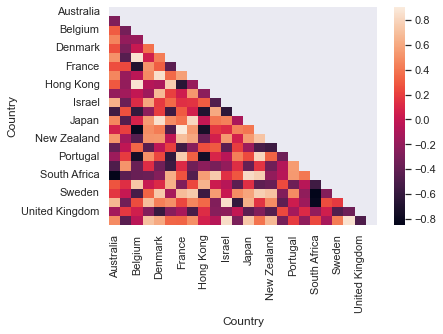

In [1045]:
# 상관관계행렬 히트맵

mask = np.zeros_like(pivoted_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pivoted_df, mask = mask)

In [1046]:
# 공분산행렬

pivoted_df_cov = pivoted_df.cov()
pivoted_df_cov[:8]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,New Zealand,Norway,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,United Kingdom,United States
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.201050,-0.080208,0.090289,0.122809,0.093557,0.102013,0.013575,0.117184,0.055825,-0.068131,...,0.116653,-0.077907,-0.063990,-0.118096,-0.110792,0.069764,0.068016,0.204647,-0.061632,0.136482
Austria,-0.080208,0.125767,-0.084028,-0.040569,-0.068872,-0.136125,0.031609,-0.051590,-0.089872,-0.023322,...,-0.041174,0.007419,0.056276,0.094693,-0.020251,-0.025506,0.006972,-0.090709,0.056783,-0.102631
Belgium,0.090289,-0.084028,0.271628,-0.055416,-0.022153,0.217108,-0.213720,-0.038488,0.244062,-0.044322,...,-0.123789,0.105693,-0.235572,-0.109162,-0.056569,0.190163,-0.151344,0.076449,0.033926,-0.014568
Canada,0.122809,-0.040569,-0.055416,0.159133,0.097470,-0.013122,0.117108,0.120920,-0.063894,-0.044807,...,0.158675,-0.124988,0.078434,-0.025788,-0.044729,-0.032254,0.125011,0.158613,-0.084064,0.148040
Denmark,0.093557,-0.068872,-0.022153,0.097470,0.169979,0.039888,0.082789,0.168805,-0.063252,0.076301,...,0.145086,-0.056137,0.041488,-0.093385,-0.018235,-0.012356,0.169582,0.110584,-0.120415,0.123799
Finland,0.102013,-0.136125,0.217108,-0.013122,0.039888,0.244044,-0.139943,0.018609,0.219882,0.009951,...,-0.040913,0.050589,-0.173843,-0.130040,-0.019807,0.131777,-0.100336,0.097906,-0.037406,0.067723
France,0.013575,0.031609,-0.213720,0.117108,0.082789,-0.139943,0.221015,0.111671,-0.201237,0.029142,...,0.181182,-0.144136,0.202310,0.041590,0.003928,-0.141918,0.183461,0.028764,-0.076873,0.090241
Germany,0.117184,-0.051590,-0.038488,0.120920,0.168805,0.018609,0.111671,0.183827,-0.083503,0.054135,...,0.167120,-0.084639,0.058750,-0.087205,-0.046777,-0.011607,0.188217,0.129267,-0.117387,0.128816


<AxesSubplot:xlabel='Country', ylabel='Country'>

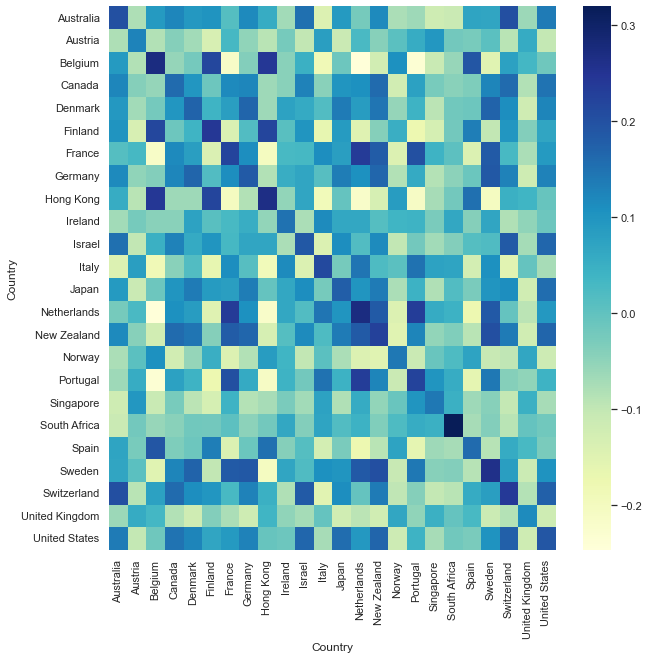

In [1047]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivoted_df_cov, cmap="YlGnBu",ax=ax)

<AxesSubplot:xlabel='Country', ylabel='Country'>

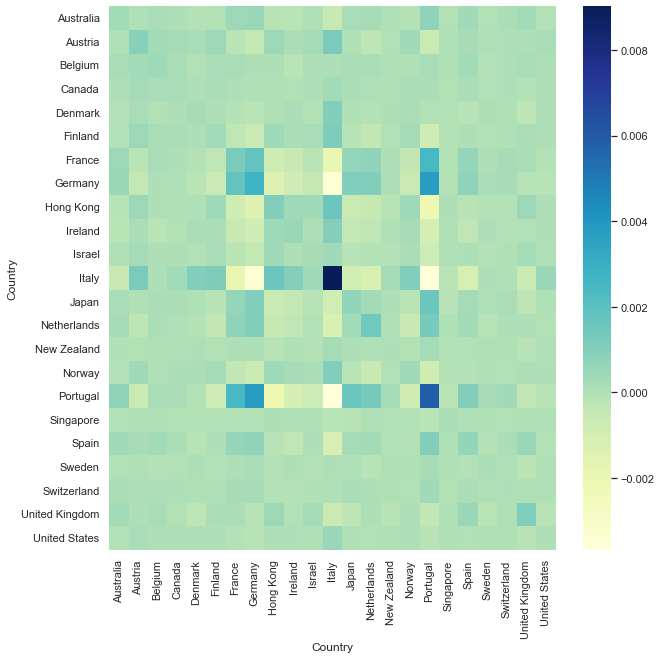

In [1048]:
# 년도별 공분산행렬 비교

pivoted_df_2019 = F1_Z_wt_mean_by_ctr[F1_Z_wt_mean_by_ctr['Periods'].str[-4:] == "2019"].pivot(index = 'Periods', columns = 'Country', values = 'F1_Z_wt_mean_by_ctr')

pivoted_df_cov_2019 = pivoted_df_2019.cov()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivoted_df_cov_2019, cmap="YlGnBu", ax=ax)

<AxesSubplot:xlabel='Country', ylabel='Country'>

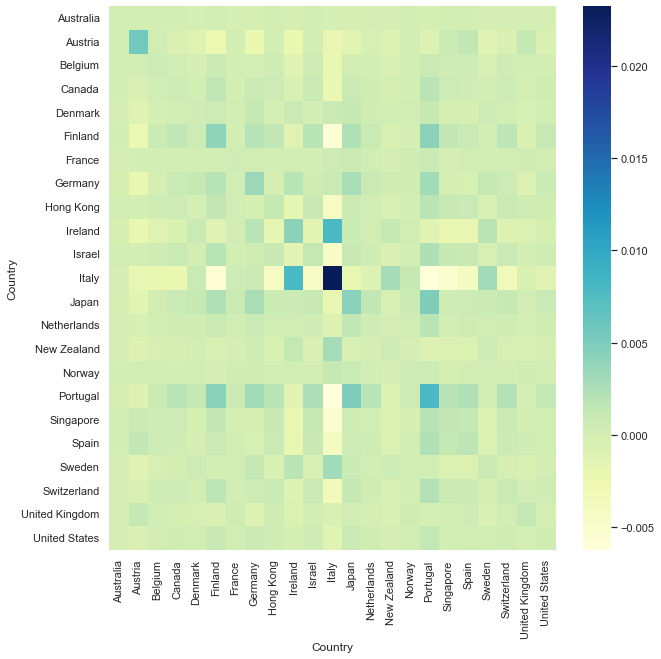

In [1049]:
pivoted_df_2020 = F1_Z_wt_mean_by_ctr[F1_Z_wt_mean_by_ctr['Periods'].str[-4:] == "2020"].pivot(index = 'Periods', columns = 'Country', values = 'F1_Z_wt_mean_by_ctr')
pivoted_df_cov_2020 = pivoted_df_2020.cov()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivoted_df_cov_2020, cmap="YlGnBu", ax=ax)

----------

In [1051]:
F2_Z_wt_mean_by_sct

,Periods,Sector,F2_Z_wt_mean_by_sct
307,2022-03-31,Utilities,3.204512
252,2022-02-28,Utilities,3.341756
54,2022-01-31,Utilities,3.299324
197,2021-12-31,Utilities,3.173008
142,2021-11-30,Utilities,3.310791
...,...,...,...
308,2018-04-30,Communication Services,1.745647
264,2018-03-30,Communication Services,1.754058
209,2018-02-28,Communication Services,1.674288
11,2018-01-31,Communication Services,1.598014


In [1052]:
# Q.Periods를 datetime으로 변경했는데도 sorting이 안되어서 rolling할 때와 시계열 그래프 그릴때 날짜 순서가 틀림
# pd.to_datetime(F2_Z_wt_mean_by_sct['Periods'], format='%m/%d/%Y') <-- 이렇게 하니깐 됨

# 변수의 MA

# 구간별 섹터별 F2 가중평균 계산
F2_Z_wt_mean_by_sct = merged_df.groupby(['Periods', 'Sector']).apply(w_avg, 'F2', 'MCAP_USD').to_frame('F2_Z_wt_mean_by_sct').reset_index()
F2_Z_wt_mean_by_sct['Periods'] = pd.to_datetime(F2_Z_wt_mean_by_sct['Periods'], format='%m/%d/%Y')
F2_Z_wt_mean_by_sct = F2_Z_wt_mean_by_sct.sort_values(by=['Sector', 'Periods'], ascending=False)
F2_Z_wt_mean_by_sct

,Periods,Sector,F2_Z_wt_mean_by_sct
307,2022-03-31,Utilities,3.204512
252,2022-02-28,Utilities,3.341756
54,2022-01-31,Utilities,3.299324
197,2021-12-31,Utilities,3.173008
142,2021-11-30,Utilities,3.310791
...,...,...,...
308,2018-04-30,Communication Services,1.745647
264,2018-03-30,Communication Services,1.754058
209,2018-02-28,Communication Services,1.674288
11,2018-01-31,Communication Services,1.598014


In [1053]:
F2_Z_wt_mean_by_sct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 307 to 143
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Periods              572 non-null    datetime64[ns]
 1   Sector               572 non-null    object        
 2   F2_Z_wt_mean_by_sct  572 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.9+ KB


In [1054]:
pivoted_df_ma = F2_Z_wt_mean_by_sct.pivot(index = 'Periods', columns = 'Sector', values = 'F2_Z_wt_mean_by_sct')
pivoted_df_ma[:7]

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Periods,,,,,,,,,,,
2017-12-29,1.675165,1.787784,2.490828,3.587705,2.705909,1.980041,1.951606,1.462047,2.081021,3.336136,3.930999
2018-01-31,1.598014,1.659749,2.446294,3.493668,2.571988,1.888776,1.873162,1.379878,1.967336,3.317814,3.969887
2018-02-28,1.674288,1.802089,2.704422,3.937857,2.768475,2.033281,2.009992,1.404245,2.347410,3.589368,4.188503
2018-03-30,1.754058,1.874600,2.708108,3.953010,2.920238,2.058782,2.076494,1.447178,2.504684,3.542916,4.179479
2018-04-30,1.745647,1.835617,2.799308,3.662326,2.908413,2.043888,2.117592,1.473219,2.487431,3.519548,4.110824
2018-05-31,1.732043,1.853609,2.863988,3.642808,3.062315,2.048626,2.130089,1.438232,2.493508,3.519083,4.247479
2018-06-29,1.726867,1.872953,2.806713,3.612313,3.122656,2.026424,2.179453,1.446140,2.560447,3.541487,4.152009


In [1055]:
pivoted_df_ma.rolling(10).apply(lambda x : x.mean())[:12]

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Periods,,,,,,,,,,,
2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Periods'>

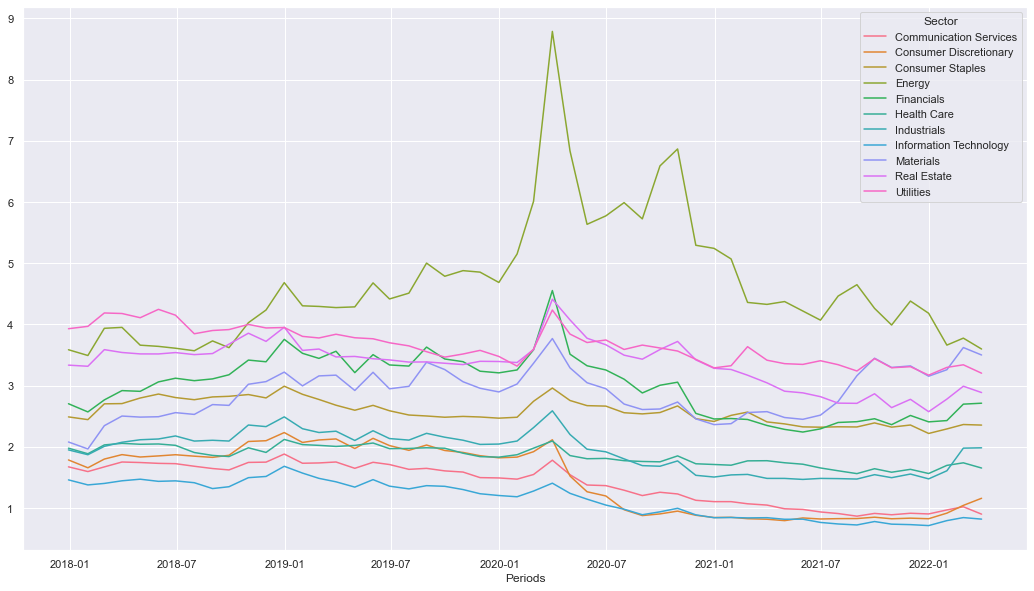

In [1056]:
# Q.MA는 2018년 9월부터 시작하는데 왜 그래프는 2017년 12월부터 표시?
  # pivoted_df_ma에 rolling & apply 적용한걸 저장하지 않아서 그럼. 그래프에 표시된건 pivoted_df_ma(rolling & apply 적용 전)임.

fig, ax = plt.subplots(figsize=(18,10))
sns.lineplot(data = pivoted_df_ma, ax=ax, dashes=False)

<AxesSubplot:xlabel='Periods'>

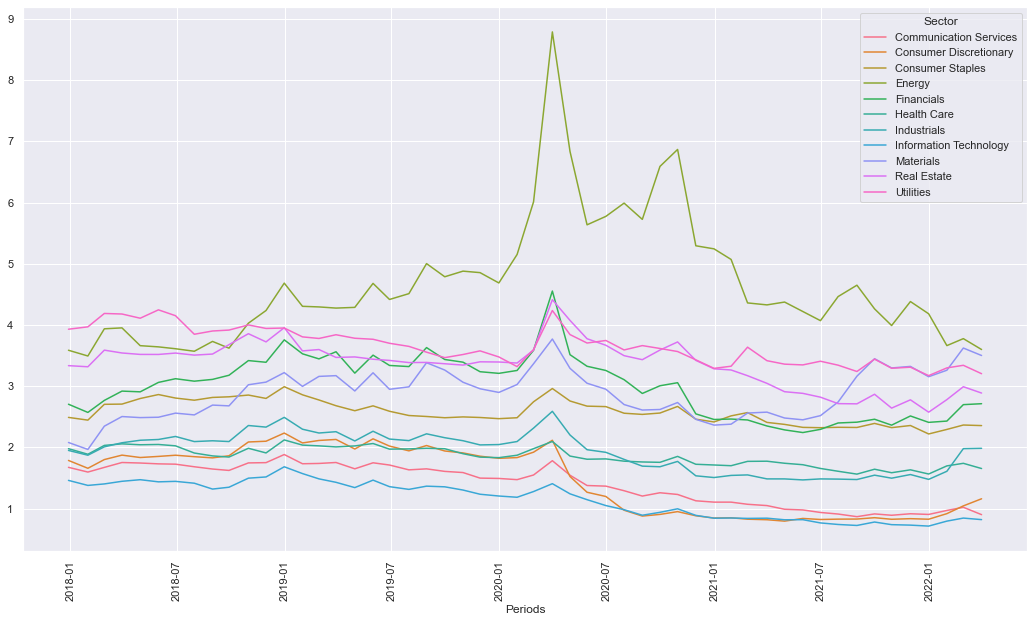

In [1057]:
plt.figure(figsize=(18,10))
plt.xticks(rotation = 'vertical')
sns.lineplot(data = pivoted_df_ma, dashes=False, sort=False)

<AxesSubplot:xlabel='Periods'>

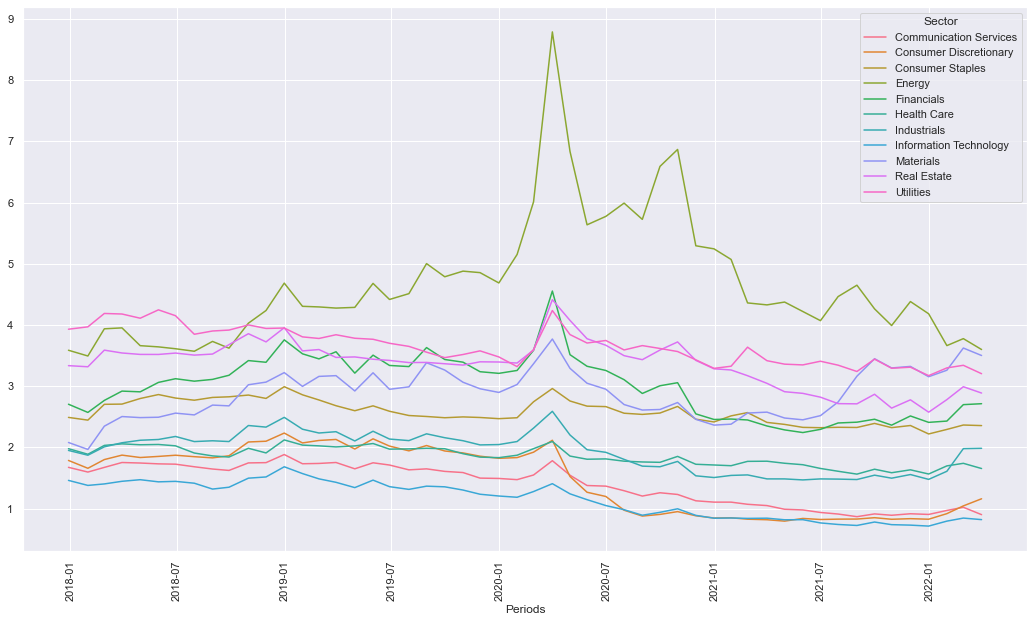

In [1058]:
import matplotlib.dates as mdates

month_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(month_locator)

plt.figure(figsize=(18,10))
plt.xticks(rotation = 'vertical')

sns.lineplot(data = pivoted_df_ma, dashes=False)

엑셀로 불러오면 datetime으로 들어오는데 CSV로 불러오면 object로 들어오는 듯

In [1059]:
F2_Z_wt_mean_by_sct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 307 to 143
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Periods              572 non-null    datetime64[ns]
 1   Sector               572 non-null    object        
 2   F2_Z_wt_mean_by_sct  572 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.9+ KB


-------------

In [1060]:
# 변수의 WMA

weights = np.array([1, 2, 3, 4])
weights_sum = np.sum(weights)

pivoted_df_wma = pivoted_df_ma.rolling(4).apply(lambda x: np.sum(x * weights) / weights_sum)

In [1061]:
pivoted_df_wma.reset_index()[:8]

Sector,Periods,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-30,1.691029,1.801195,2.632911,3.820065,2.783626,2.009256,2.003388,1.422325,2.307666,3.491153,4.115420
4,2018-04-30,1.719135,1.823020,2.717669,3.787772,2.850330,2.030723,2.059300,1.442278,2.412593,3.520349,4.132863
5,2018-05-31,1.734752,1.847258,2.797451,3.740209,2.958345,2.047701,2.103611,1.447118,2.479310,3.531018,4.186985
6,2018-06-29,1.734895,1.859847,2.812554,3.665534,3.041463,2.039813,2.141976,1.449287,2.520186,3.530521,4.175160
7,2018-07-31,1.712879,1.855867,2.803384,3.606965,3.073080,1.985642,2.130014,1.435163,2.528209,3.521451,4.045681


<AxesSubplot:xlabel='Periods'>

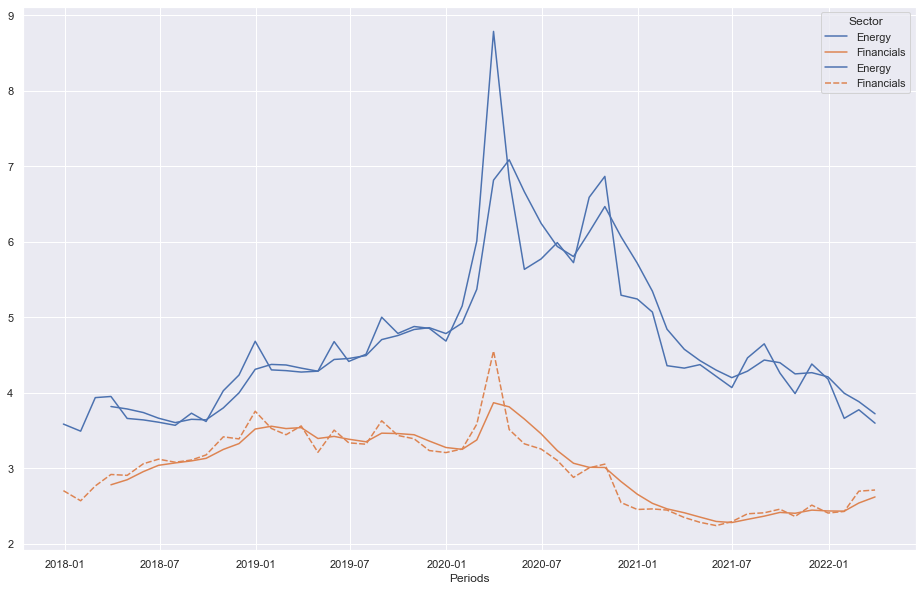

In [1062]:
# MA와 WMA 오버레이 그래프

plt.figure(figsize=(16,10))
sns.lineplot(data = pivoted_df_wma[['Energy', 'Financials']], dashes = False)
sns.lineplot(data = pivoted_df_ma[['Energy', 'Financials']], dashes = True)

---------

In [1063]:
# 변수의 EMA

# 구간별 국가별 F2 가중평균 계산
F2_Z_wt_mean_by_ctr = merged_df.groupby(['Periods', 'Country']).apply(w_avg, 'F2', 'MCAP_USD').to_frame('F2_Z_wt_mean_by_ctr').reset_index()
F2_Z_wt_mean_by_ctr['Periods'] = pd.to_datetime(F2_Z_wt_mean_by_ctr['Periods'], format='%m/%d/%Y')
F2_Z_wt_mean_by_ctr.sort_values(by='Periods', ascending=False)
F2_Z_wt_mean_by_ctr

,Periods,Country,F2_Z_wt_mean_by_ctr
0,2021-01-29,Australia,2.874568
1,2021-01-29,Austria,1.970847
2,2021-01-29,Belgium,1.657993
3,2021-01-29,Canada,3.071432
4,2021-01-29,Denmark,1.243039
...,...,...,...
1197,2021-09-30,Spain,2.511342
1198,2021-09-30,Sweden,1.926438
1199,2021-09-30,Switzerland,2.467691
1200,2021-09-30,United Kingdom,3.858204


In [1064]:
F2_Z_wt_mean_by_ctr = F2_Z_wt_mean_by_ctr.pivot(index = 'Periods', columns = 'Country', values = 'F2_Z_wt_mean_by_ctr')
F2_Z_wt_mean_by_ctr.reset_index()

Country,Periods,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,...,New Zealand,Norway,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,United Kingdom,United States
0,2017-12-29,4.340039,2.020501,2.452919,2.877021,1.995422,3.953565,2.806758,2.368575,2.905733,...,4.570949,3.850161,4.298873,3.216674,3.046560,2.985803,3.259005,3.145156,3.915692,1.737653
1,2018-01-31,4.215346,1.830813,2.349733,2.823607,1.999153,3.808260,2.643165,2.231830,2.784255,...,4.393834,3.637822,4.091418,3.088345,2.872063,2.812168,3.191391,3.042744,3.798375,1.658409
2,2018-02-28,4.373198,2.102453,2.501784,3.211990,2.169554,4.011775,2.905736,2.608731,2.937792,...,4.317874,3.931717,4.275018,3.436171,2.714567,3.037951,3.569306,3.226488,4.305898,1.760150
3,2018-03-30,4.692900,2.672280,2.495610,3.316834,2.207569,4.101190,2.924767,2.685820,3.209348,...,4.418652,3.969700,4.229649,3.504140,2.918556,3.127801,3.704129,3.342240,4.339690,1.814289
4,2018-04-30,4.580459,2.709130,2.645635,3.249105,2.223559,3.957842,2.778263,2.656005,3.122315,...,4.423840,3.873275,4.391420,3.343272,2.827167,3.086194,3.804985,3.395375,4.150589,1.826809
5,2018-05-31,4.585120,2.961147,2.827098,3.233392,2.289052,4.048748,2.932353,2.817137,3.133217,...,4.306650,3.924379,4.506356,3.645510,3.070389,3.333888,3.899622,3.520781,4.219001,1.801664
6,2018-06-29,4.551948,3.137673,2.718494,3.232172,2.405172,4.089626,2.988432,2.893088,3.357998,...,3.516226,3.810124,4.519200,3.836245,NaN,3.287577,3.940549,3.461873,4.256489,1.797434
7,2018-07-31,4.451534,3.007981,2.675689,3.169268,2.254237,4.010305,2.909922,2.779896,2.928682,...,3.525889,3.790140,4.303065,3.802467,NaN,3.191211,3.733114,3.242399,4.252382,1.762990
8,2018-08-31,4.603045,3.259388,2.879341,3.245429,2.251841,3.915856,2.953269,2.876169,3.075916,...,3.064873,3.830511,4.381463,4.141890,NaN,3.334735,3.801381,3.220577,4.498828,1.717887
9,2018-09-28,4.689597,3.156879,2.990699,3.249538,2.339773,3.951309,2.922152,2.963741,3.144994,...,3.137837,3.591656,4.599510,4.070494,NaN,3.355860,3.673919,3.226414,4.391617,1.743417


In [1065]:
F2_Z_wt_mean_by_ctr = merged_df.groupby(['Periods', 'Country']).apply(w_avg, 'F2', 'MCAP_USD').to_frame('F2_Z_wt_mean_by_ctr').reset_index()
F2_Z_wt_mean_by_ctr['Periods'] = pd.to_datetime(F2_Z_wt_mean_by_ctr['Periods'], format='%m/%d/%Y')
F2_Z_wt_mean_by_ctr.sort_values(by='Periods', ascending=False)
F2_Z_wt_mean_by_ctr

,Periods,Country,F2_Z_wt_mean_by_ctr
0,2021-01-29,Australia,2.874568
1,2021-01-29,Austria,1.970847
2,2021-01-29,Belgium,1.657993
3,2021-01-29,Canada,3.071432
4,2021-01-29,Denmark,1.243039
...,...,...,...
1197,2021-09-30,Spain,2.511342
1198,2021-09-30,Sweden,1.926438
1199,2021-09-30,Switzerland,2.467691
1200,2021-09-30,United Kingdom,3.858204


In [1066]:
F2_Z_wt_mean_by_ctr_ema = F2_Z_wt_mean_by_ctr.pivot(index = 'Periods', columns = 'Country', values = 'F2_Z_wt_mean_by_ctr').ewm(com=0.6).mean()
F2_Z_wt_mean_by_ctr_ema[:5]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,New Zealand,Norway,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2017-12-29,4.340039,2.020501,2.452919,2.877021,1.995422,3.953565,2.806758,2.368575,2.905733,1.181262,...,4.570949,3.850161,4.298873,3.216674,3.046560,2.985803,3.259005,3.145156,3.915692,1.737653
2018-01-31,4.249353,1.882546,2.377875,2.838175,1.998135,3.847888,2.687781,2.269124,2.817386,1.139067,...,4.442138,3.695733,4.147997,3.123344,2.919653,2.859523,3.209831,3.070675,3.830371,1.680021
2018-02-28,4.331065,2.027639,2.459629,3.084816,2.111237,3.956020,2.831586,2.493195,2.896829,1.275258,...,4.360149,3.851434,4.231805,3.329745,2.784339,2.977249,3.447011,3.173479,4.144120,1.732890
2018-03-30,4.561775,2.438668,2.482571,3.232753,2.172659,4.048582,2.890999,2.616015,3.096094,1.398754,...,4.397451,3.926842,4.230430,3.440941,2.869917,3.073242,3.610952,3.281083,4.268817,1.784791
2018-04-30,4.573540,2.608969,2.585247,3.243049,2.204709,3.991446,2.820012,2.641196,3.112604,1.441411,...,4.414067,3.893112,4.331800,3.379442,2.842999,3.081398,3.733129,3.353049,4.194372,1.811248


In [1067]:
plt.figure(figsize=(16,10))
sns.lineplot(data = F2_Z_wt_mean_by_ctr[['Australia', 'Japan']], dashes=False)
sns.lineplot(data = F2_Z_wt_mean_by_ctr_ema[['Australia', 'Japan']])

KeyError: "None of [Index(['Australia', 'Japan'], dtype='object')] are in the [columns]"

<Figure size 1152x720 with 0 Axes>

----------

<AxesSubplot:ylabel='Count'>

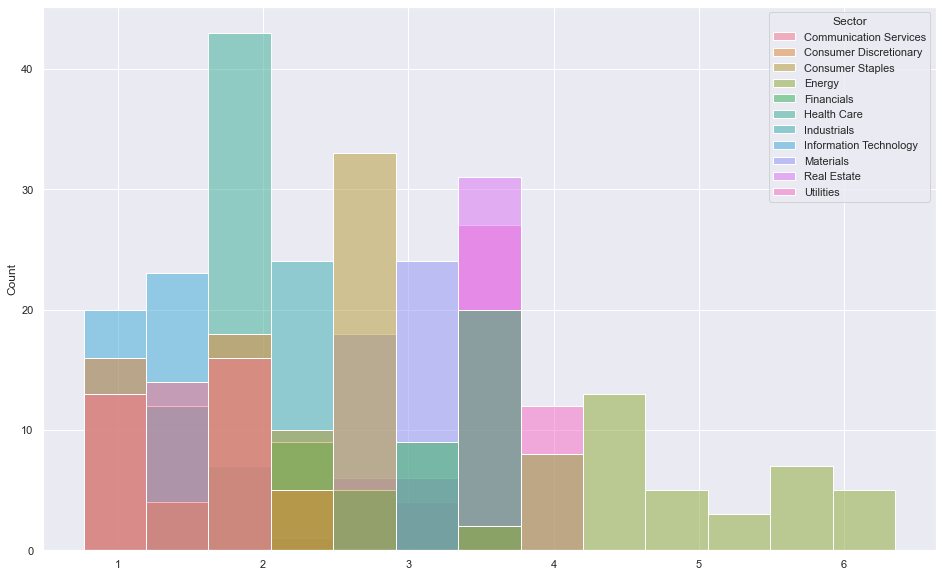

In [ ]:
# MA 히스토그램

pivoted_df_ma_distplot = pivoted_df_ma.rolling(10).apply(lambda x : x.mean())

plt.figure(figsize=(16,10))
sns.histplot(data = pivoted_df_ma_distplot)

----------

In [1068]:
# 팩터와 수익률 Scatter Plot

df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201


In [1069]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia/Pacific Ex Japan', 'Japan',
       'Africa/Mideast'], dtype=object)

In [1070]:
df['Country'].unique()

array(['United States', 'United Kingdom', 'Hong Kong', 'Canada', 'France',
       'Germany', 'Italy', 'Spain', 'Portugal', 'Netherlands', 'Denmark',
       'Ireland', 'Finland', 'Belgium', 'Sweden', 'Austria', 'Norway',
       'Switzerland', 'Japan', 'Australia', 'Singapore', 'Israel',
       'New Zealand', 'South Africa'], dtype=object)

<AxesSubplot:xlabel='F1', ylabel='Universe Returns'>

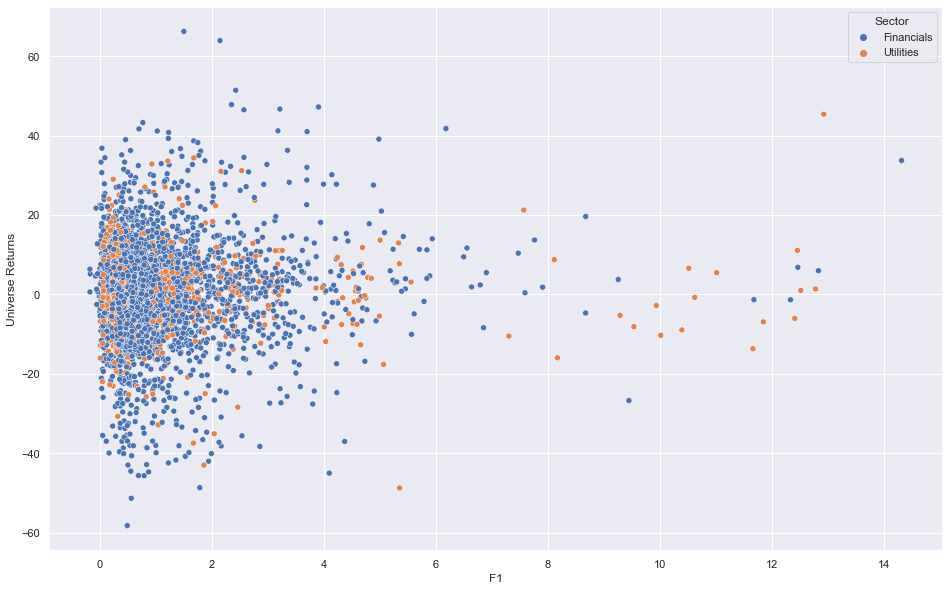

In [1071]:
# Q.아래는 2020년도 데이터 모두를 섹터 hue로 뿌린건데, 만약 특정 섹터만 보고싶으면 어떻게 할지?
    # &이랑 |로 다중조건 설정하면 됨.

plt.figure(figsize=(16,10))
sns.scatterplot(data = df[ (df['Periods'].str[-4:] == "2020") & ( (df['Sector'] == "Financials") | (df['Sector'] == "Utilities") )], x = "F1", y = "Universe Returns", hue = "Sector")

<AxesSubplot:xlabel='F1', ylabel='Universe Returns'>

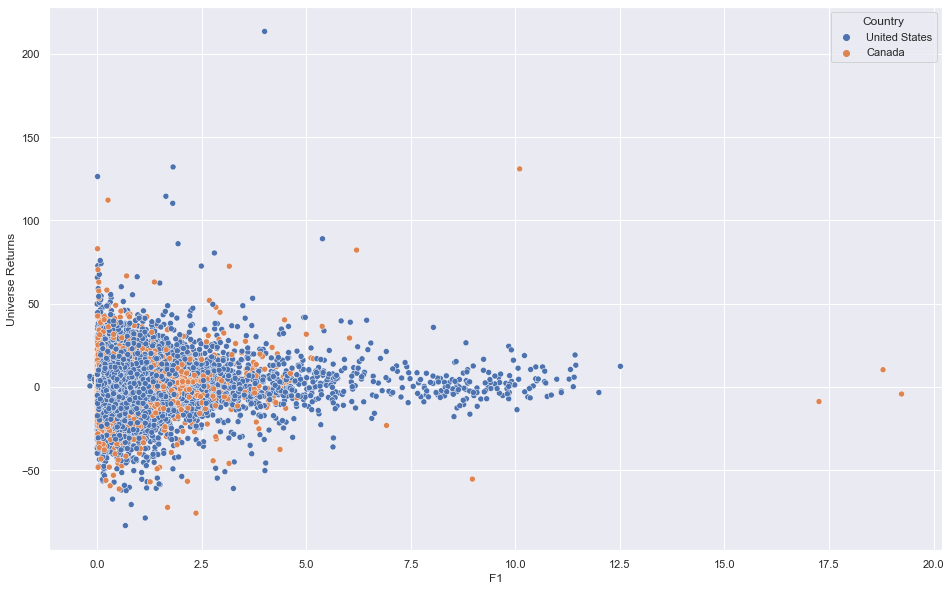

In [1072]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df[df['Region'] == "North America"], x = "F1", y = "Universe Returns", hue = "Country")

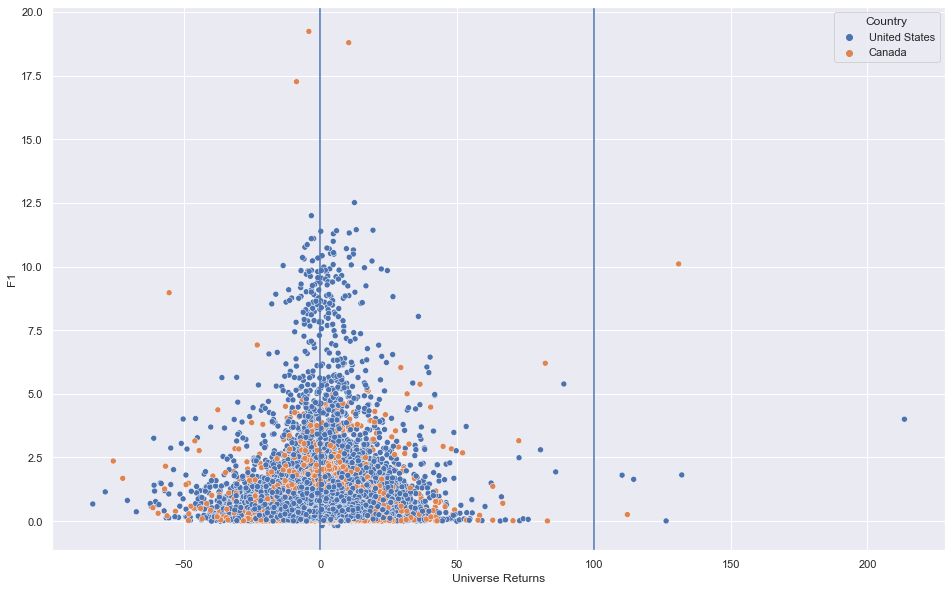

In [1073]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df[df['Region'] == "North America"], y = "F1", x = "Universe Returns", hue = "Country")
plt.axvline(x = 0)
plt.axvline(x = 100)

<AxesSubplot:xlabel='F1', ylabel='Universe Returns'>

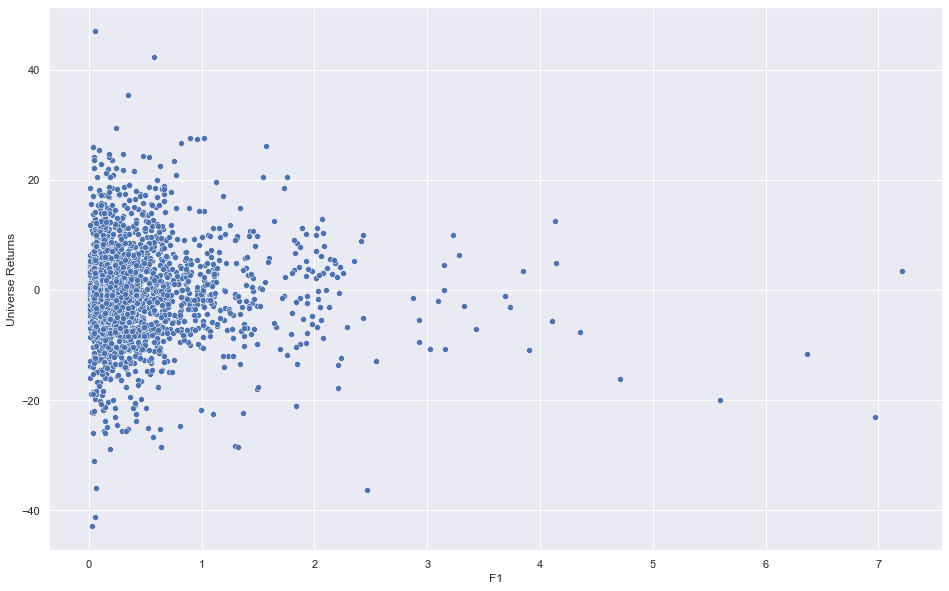

In [1074]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df[df['Country'] == "Hong Kong"], x = "F1", y = "Universe Returns")

<AxesSubplot:xlabel='F2', ylabel='Universe Returns'>

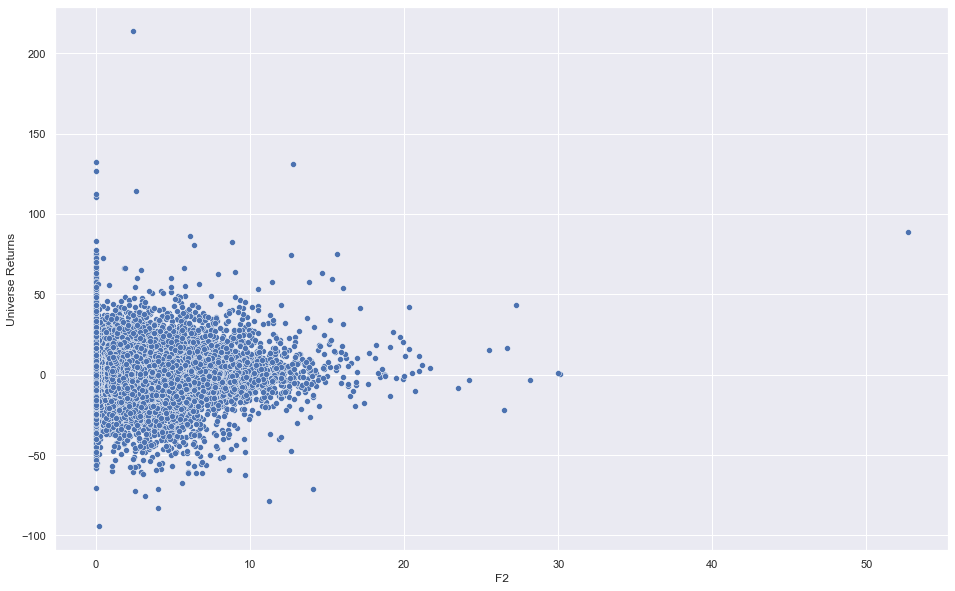

In [1075]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df, x = "F2", y = "Universe Returns")

<AxesSubplot:xlabel='F1', ylabel='Universe Returns'>

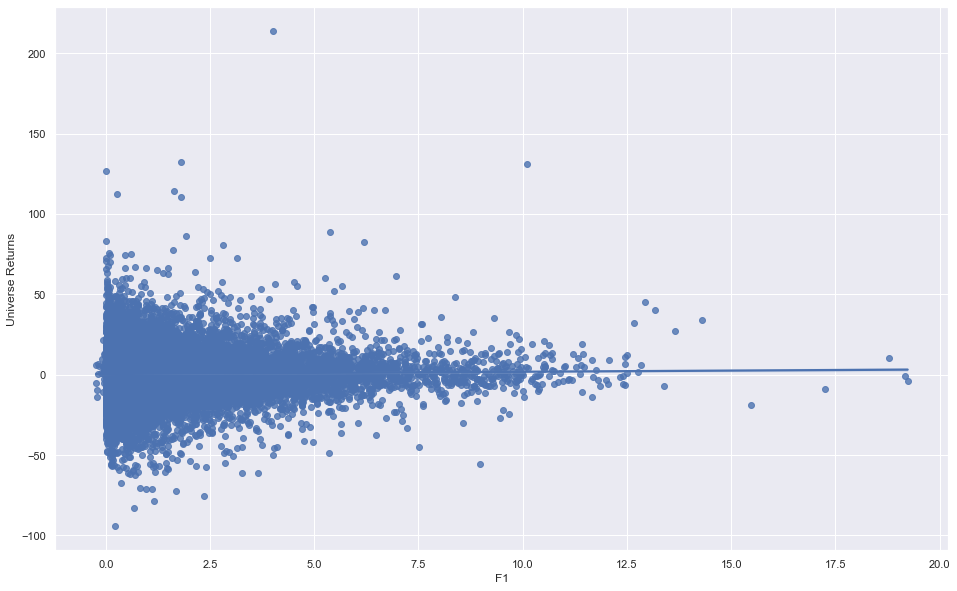

In [1076]:
plt.figure(figsize=(16,10))
sns.regplot(data = df, x = "F1", y = "Universe Returns")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

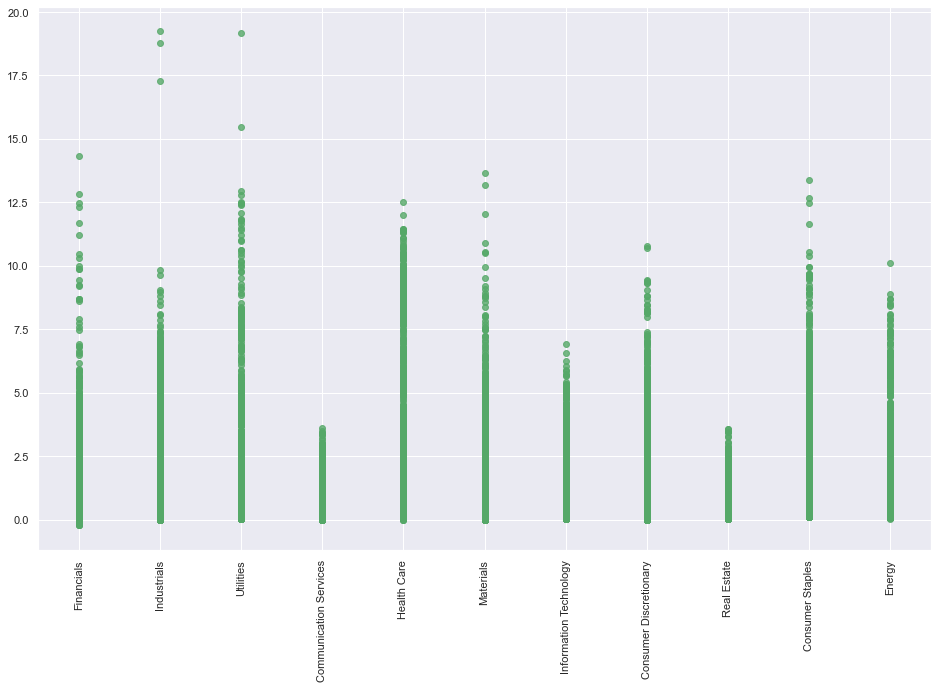

In [1078]:
plt.figure(figsize=(16,10))
plt.xticks(rotation = 'vertical')
sns.regplot(data = df, x = "Sector", y = "F1", color = "g")

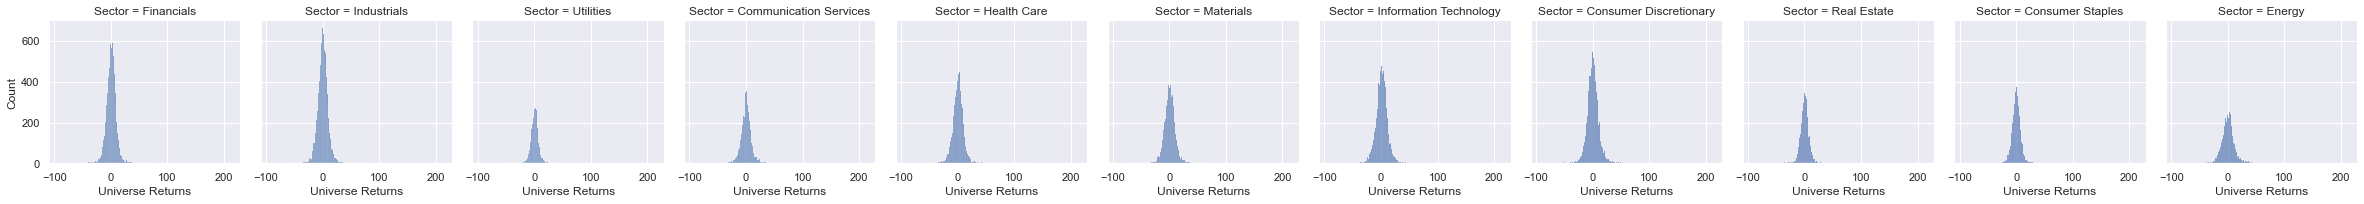

In [ ]:
sct = sns.FacetGrid(df, col="Sector")
sct.map(sns.histplot, "Universe Returns")

In [ ]:
df['Country'].unique()

array(['United States', 'United Kingdom', 'Hong Kong', 'Canada', 'France',
       'Germany', 'Italy', 'Spain', 'Portugal', 'Netherlands', 'Denmark',
       'Ireland', 'Finland', 'Belgium', 'Sweden', 'Austria', 'Norway',
       'Switzerland', 'Japan', 'Australia', 'Singapore', 'Israel',
       'New Zealand', 'South Africa'], dtype=object)

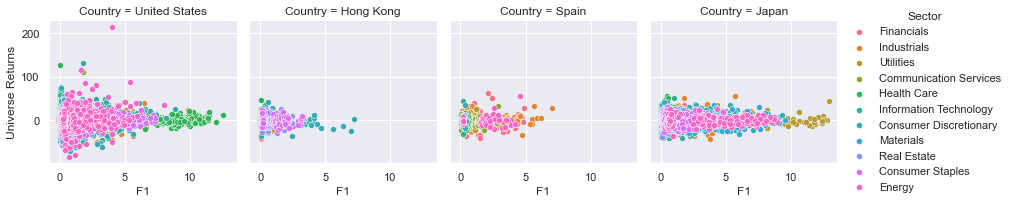

In [ ]:
sct_df = sns.FacetGrid(df[ (df['Country'] == "United States") | (df['Country'] == "Japan") | (df['Country'] == "Hong Kong") | (df['Country'] == "Spain") ], col="Country", hue="Sector")
sct_df.map(sns.scatterplot, "F1", "Universe Returns")
sct_df.add_legend()


----

In [1079]:
# Size-Neutralization용 MCAP 그루핑 칼럼 생성
# 구간별 국가별 MCAP이 상위25%일 경우 MEGA, 하위25% 경우 SMID, 그 외 LARGE.

# 구간별 국가별 MCAP pct rank
df['MCAP_USD_ctr_pct_rank'] = df.groupby(['Periods', 'Country'])['MCAP_USD'].rank(ascending=False, pct=True)

# pct rank에 따라 분류
col = 'MCAP_USD_ctr_pct_rank'
conditions = [df[col] <= 0.25, (df[col] > 0.25) & (df[col] <= 0.75), df[col] > 0.75]
choices = ["MEGA", "LARGE", "SMID"]

df['MCAP_Class'] = np.select(conditions, choices, default=np.nan)
df['MCAP_Class'].to_frame() # df에 저장하려면 to_frame() 해줘야 함

df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID


In [1080]:
# F1 결측치 구간별 국가별 섹터별 평균으로 치환

df['F1_filled'] = df['F1'].fillna(df.groupby(['Periods', 'Country', 'Sector'])['F1'].transform('mean'))

In [1081]:
df['F1_filled_2'] = df['F1_filled'].fillna(df.groupby(['Periods', 'Country'])['F1_filled'].transform('mean'))

In [1082]:
df['F1_filled_2'].to_frame()

,F1_filled_2
0,0.647660
1,0.644576
2,0.640912
3,0.635302
4,0.614165
...,...
83922,3.732880
83923,4.456142
83924,5.911372
83925,5.072514


In [1083]:
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514


In [1084]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83927 entries, 0 to 83926
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           83927 non-null  object 
 1   Periods                83927 non-null  object 
 2   Ticker                 83865 non-null  object 
 3   Universe Returns       83633 non-null  float64
 4   Region                 83927 non-null  object 
 5   Country                83927 non-null  object 
 6   Sector                 83927 non-null  object 
 7   MCAP_USD               83762 non-null  float64
 8   F1                     83653 non-null  float64
 9   F2                     83675 non-null  float64
 10  F3                     73513 non-null  float64
 11  MCAP_USD_ctr_pct_rank  83762 non-null  float64
 12  MCAP_Class             83927 non-null  object 
 13  F1_filled              83924 non-null  float64
 14  F1_filled_2            83927 non-null  float64
dtypes:

In [1085]:
df['Periods_MCAP_Class'] = df['Periods'] + " " + df['MCAP_Class']
df['Periods_MCAP_Class'].to_frame()
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID


In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83927 entries, 0 to 83926
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           83927 non-null  object 
 1   Periods                83927 non-null  object 
 2   Ticker                 83865 non-null  object 
 3   Universe Returns       83633 non-null  float64
 4   Region                 83927 non-null  object 
 5   Country                83927 non-null  object 
 6   Sector                 83927 non-null  object 
 7   MCAP_USD               83762 non-null  float64
 8   F1                     83653 non-null  float64
 9   F2                     83675 non-null  float64
 10  F3                     73513 non-null  float64
 11  MCAP_USD_ctr_pct_rank  83762 non-null  float64
 12  MCAP_Class             83927 non-null  object 
 13  F1_filled              83924 non-null  float64
 14  F1_filled_2            83927 non-null  float64
 15  Pe

In [1086]:
# 구간별 사이즈별 F1 분위 나누기
# 지금은 [0:4]로 나눠지는데, [1:5]로 표시 가능?

df['F1_Q'] = df.groupby(['Periods_MCAP_Class'])['F1_filled_2'].transform(lambda x: pd.qcut(x, 5, labels = False, duplicates = 'drop')) + 1
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,4
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,4
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,4
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,4
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,5
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,5
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,5
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,5


In [1087]:
# 시간의 흐름에 따른 F1_Q의 국가분포

df_ctr_dist = df[df['F1_Q'] == 1].groupby(['Periods', 'Country'])['F1_Q'].count().to_frame()
df_ctr_dist

F1_Q
Periods   Country             
1/29/2021 Australia         16
          Belgium            3
          Canada            11
          Denmark            6
          Finland            1
...                        ...
9/30/2021 Spain              3
          Sweden             8
          Switzerland        7
          United Kingdom    11
          United States    166

[1022 rows x 1 columns]

In [1088]:
df_pivoted_ctr_dist = pd.pivot_table(df, index=['Periods'], columns=['Country'], values=['F1_Q'], aggfunc='count')
df_pivoted_ctr_dist[:5]

F1_Q                                                        \
Country   Australia Austria Belgium Canada Denmark Finland France Germany   
Periods                                                                     
1/29/2021      65.0     5.0    13.0   88.0    19.0    11.0   73.0    63.0   
1/31/2018      67.0     5.0    10.0   91.0    18.0    12.0   80.0    63.0   
1/31/2019      68.0     6.0    10.0   91.0    17.0    12.0   79.0    64.0   
1/31/2020      69.0     6.0    11.0   90.0    17.0    12.0   77.0    59.0   
1/31/2022      62.0     5.0    12.0   89.0    18.0    11.0   68.0    61.0   

                             ...                                        \
Country   Hong Kong Ireland  ... New Zealand Norway Portugal Singapore   
Periods                      ...                                         
1/29/2021      38.0     5.0  ...         7.0   11.0      3.0      19.0   
1/31/2018      48.0     6.0  ...         7.0    9.0      3.0      26.0   
1/31/2019      47.0     8.0  ...         7.0   10.0      3.0      25.0   
1/31/2020      43.0     7.0  ...         8.0   10.0      3.0      25.0   
1/31/2022      35.0     5.0  ...         6.0   12.0      4.0      19.0   

                                                                              
Country   South Africa Spain Sweden Switzerland United Kingdom United States  
Periods                                                                       
1/29/2021          NaN  18.0   38.0        39.0           88.0         620.0  
1/31/2018          1.0  23.0   31.0        37.0          101.0         633.0  
1/31/2019          NaN  22.0   32.0        38.0           96.0         621.0  
1/31/2020          NaN  22.0   32.0        39.0           96.0         637.0  
1/31/2022          NaN  18.0   44.0        41.0           82.0         628.0  

[5 rows x 24 columns]

In [1094]:
# 피벗테이블(인덱스=날짜, 칼럼=국가)에서 각 날짜별 상위 5개 국가만 그래프에 표시하고싶을 때?

df_pivoted_ctr_dist = df_pivoted_ctr_dist.fillna(0)

In [1109]:
rank_filter = 5
df_pivoted_ctr_dist_rank_filter = df_pivoted_ctr_dist[df_pivoted_ctr_dist.rank(axis=1, ascending=False) <= rank_filter]

In [1110]:
# axis=1 -> Row에서 순위매기게 해주는 인수

df_pivoted_ctr_dist_rank_filter = df_pivoted_ctr_dist_rank_filter.dropna(how='all', axis=1)

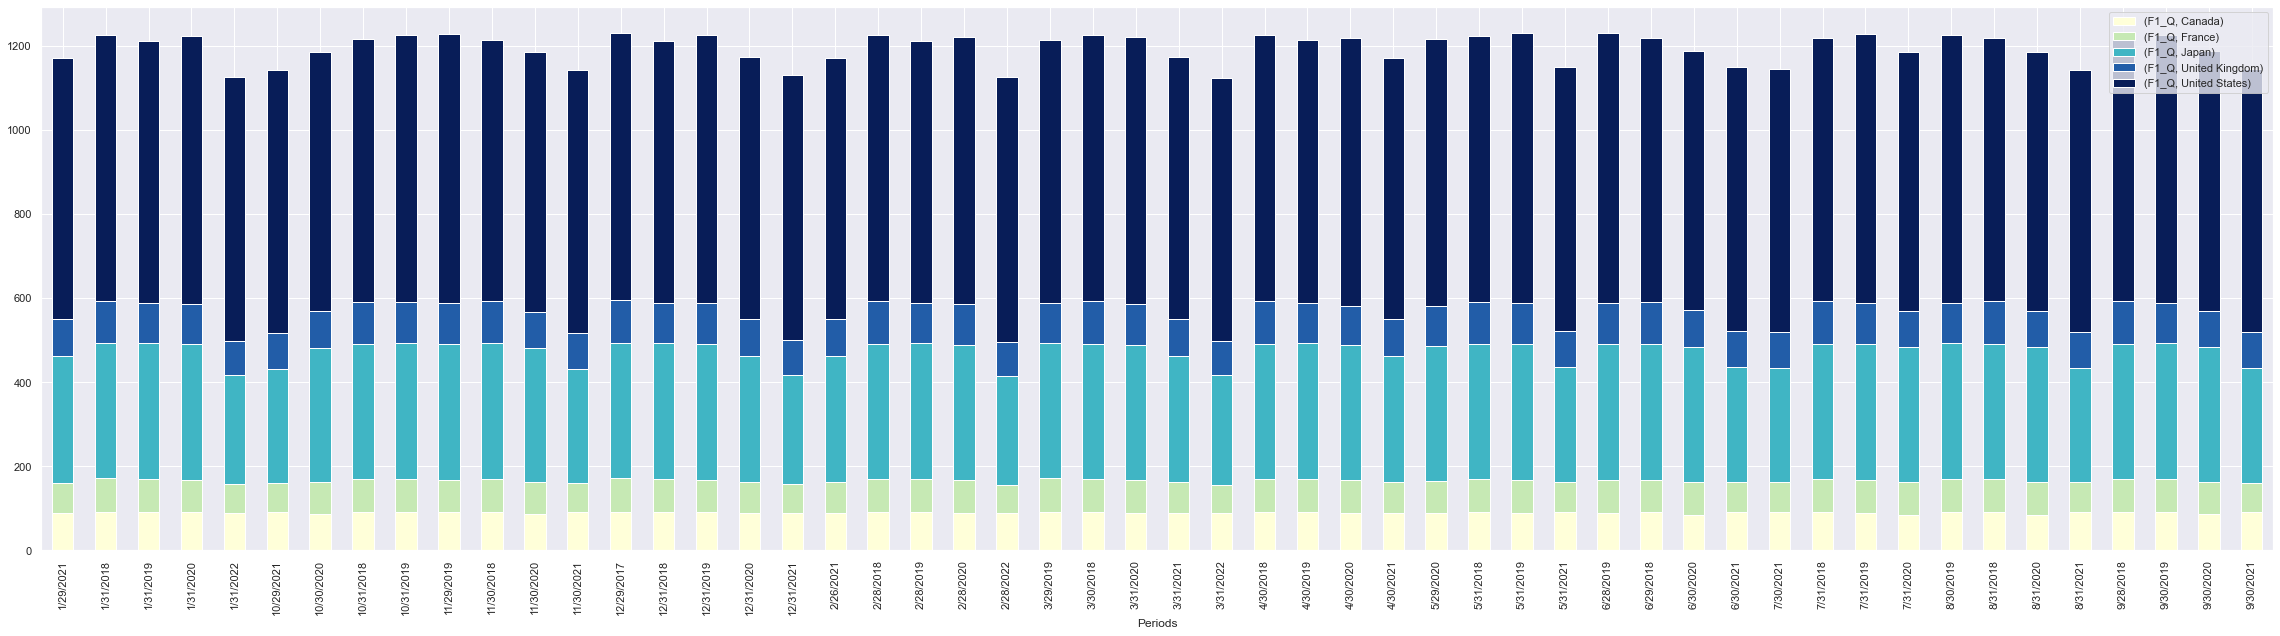

In [1111]:
df_pivoted_ctr_dist_rank_filter.plot(kind = 'bar', stacked = True, figsize=(40,10), colormap = 'YlGnBu')
plt.legend(loc='upper right')

In [887]:
# 시간의 흐름에 따른 시총 사이즈 분류별 F1 1분위 개수

df_pivoted_mcap_dist = pd.pivot_table(df, index=['Periods'], columns=['MCAP_Class'], values=['F1_Q'], aggfunc='count')

<AxesSubplot:xlabel='Periods'>

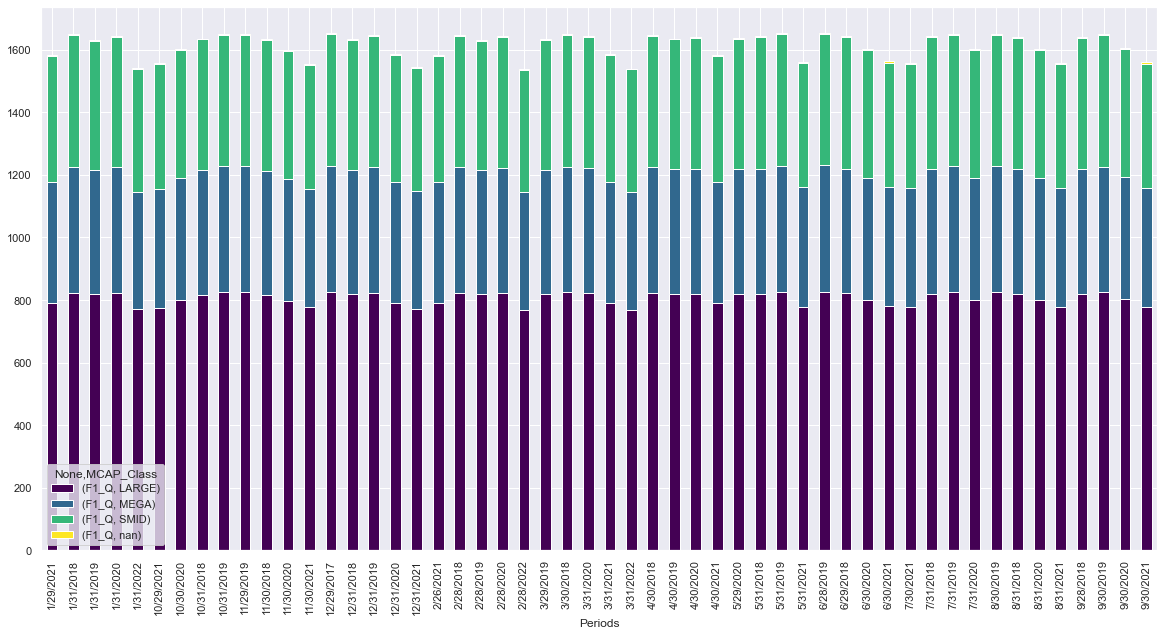

In [888]:
# Size bias 체크

df_pivoted_mcap_dist.plot(kind = 'bar', stacked = True, figsize = (20,10), colormap = 'viridis')

-----------

In [889]:
# F1_Q별 수익률 계산: 단순평균 & 시총 가중평균
# Pivot으로 전환 -> 시계열 누적수익률 계산 (맞나?)

df['Periods'] = pd.to_datetime(df['Periods'], format='%m/%d/%Y')

df_pivoted_mean_ret_by_F1 = pd.pivot_table(df, index = ['Periods'], columns = ['F1_Q'], values = ['Universe Returns'], aggfunc = 'mean')
df_pivoted_mean_ret_by_F1 = df_pivoted_mean_ret_by_F1/100
df_pivoted_mean_ret_by_F1[:5]

Universe Returns                                        
F1_Q                      0         1         2         3         4
Periods                                                            
2017-12-29         0.047145  0.045442  0.044816  0.047372  0.046561
2018-01-31        -0.037057 -0.044552 -0.046359 -0.039735 -0.039962
2018-02-28        -0.001298 -0.008718 -0.015745 -0.012141 -0.018872
2018-03-30         0.007592  0.012551  0.012189  0.008990  0.026096
2018-04-30         0.023756  0.005910 -0.000611 -0.013507 -0.019262

In [890]:
# F1_Q 단순평균 시계열 수익률 Geometric linking (누적수익률)

cumret = (1 + df_pivoted_mean_ret_by_F1).cumprod() -1
cumret[:5]


Universe Returns                                        
F1_Q                      0         1         2         3         4
Periods                                                            
2017-12-29         0.047145  0.045442  0.044816  0.047372  0.046561
2018-01-31         0.008341 -0.001134 -0.003621  0.005755  0.004739
2018-02-28         0.007032 -0.009842 -0.019308 -0.006456 -0.014222
2018-03-30         0.014678  0.002585 -0.007355  0.002476  0.011503
2018-04-30         0.038783  0.008511 -0.007961 -0.011064 -0.007980

In [1113]:
cumret.columns.droplevel()

Index([0, 1, 2, 3, 4, ''], dtype='object', name='F1_Q')

In [1114]:
cumret.columns = cumret.columns.droplevel()

<AxesSubplot:xlabel='Periods'>

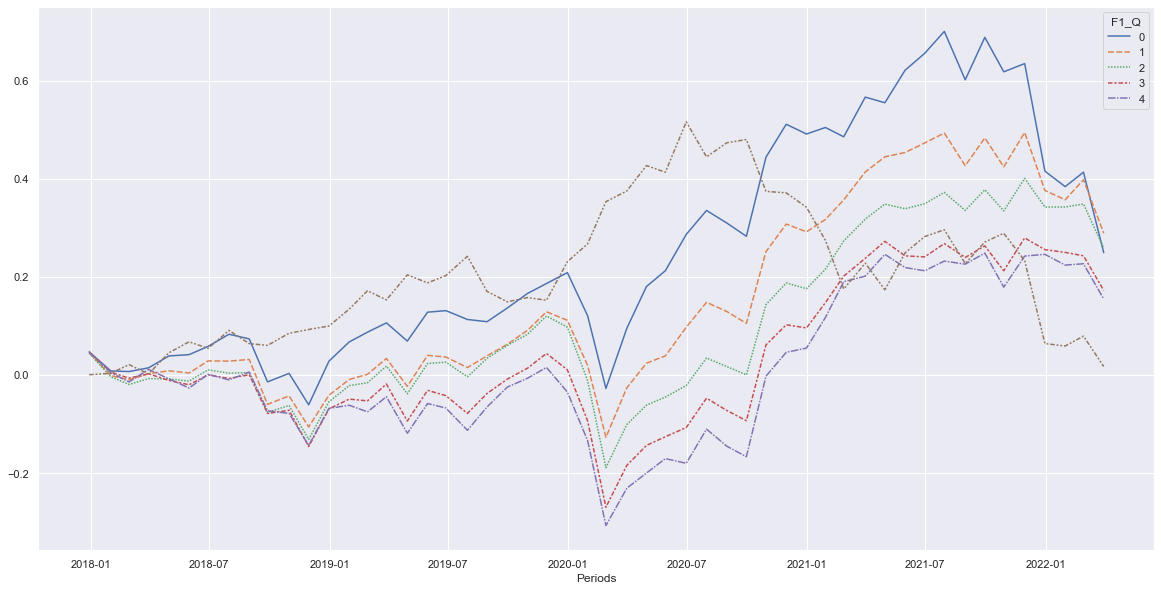

In [1115]:
# seaborn은 왜 0~1까지 모든 칼럼이 표시가 안될까? 칼럼이라 hue도 못쓰는듯

plt.figure(figsize = (20,10))
sns.lineplot(data = cumret)

<AxesSubplot:xlabel='Periods'>

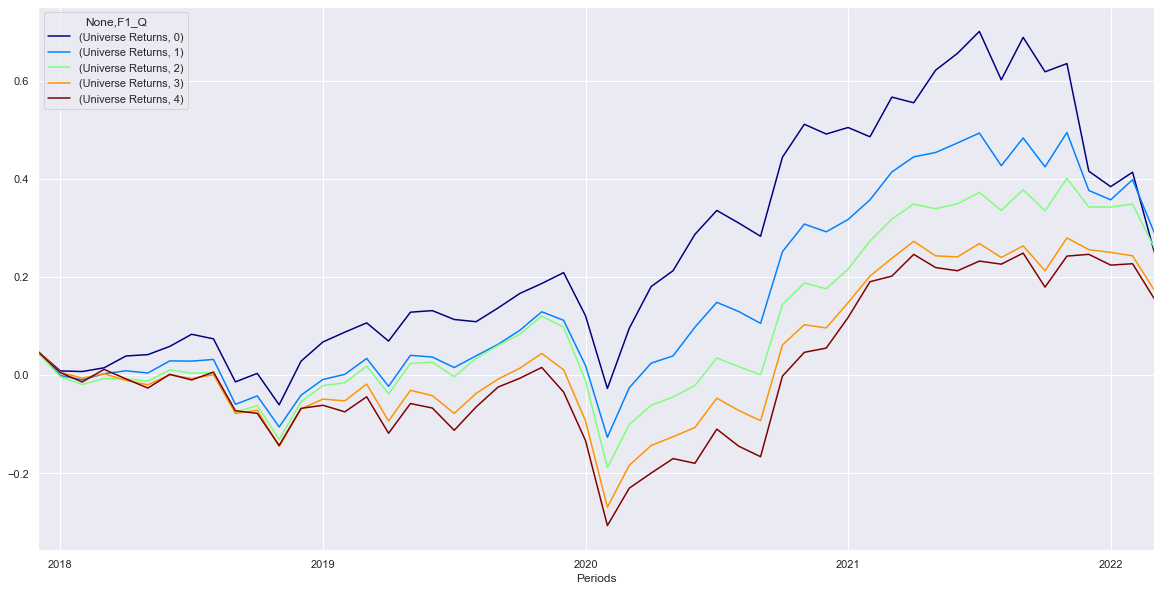

In [892]:
cumret.plot(kind = "line", figsize=(20,10), colormap = 'jet')

In [893]:
df_pivoted_mean_ret_by_F1.info()
df_pivoted_mean_ret_by_F1[:5]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2017-12-29 to 2022-03-31
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Universe Returns, 0)  52 non-null     float64
 1   (Universe Returns, 1)  52 non-null     float64
 2   (Universe Returns, 2)  52 non-null     float64
 3   (Universe Returns, 3)  52 non-null     float64
 4   (Universe Returns, 4)  52 non-null     float64
dtypes: float64(5)
memory usage: 2.4 KB


Universe Returns                                        
F1_Q                      0         1         2         3         4
Periods                                                            
2017-12-29         0.047145  0.045442  0.044816  0.047372  0.046561
2018-01-31        -0.037057 -0.044552 -0.046359 -0.039735 -0.039962
2018-02-28        -0.001298 -0.008718 -0.015745 -0.012141 -0.018872
2018-03-30         0.007592  0.012551  0.012189  0.008990  0.026096
2018-04-30         0.023756  0.005910 -0.000611 -0.013507 -0.019262

In [894]:
list(df_pivoted_mean_ret_by_F1.columns)

[('Universe Returns', 0),
 ('Universe Returns', 1),
 ('Universe Returns', 2),
 ('Universe Returns', 3),
 ('Universe Returns', 4)]

In [895]:
# L/S 수익률 계산 (구간별 스프레드 후 누적방식)
# Pivot 칼럼 특정할땐 df.columns를 통해 표시되는 이름 사용. 예 --> ('Universe Returns', 0)

df_pivoted_mean_ret_by_F1['LS_ret'] = df_pivoted_mean_ret_by_F1[('Universe Returns', 0)] - df_pivoted_mean_ret_by_F1[('Universe Returns', 4)]

In [896]:
df_pivoted_mean_ret_by_F1[:5]

Universe Returns                                            LS_ret
F1_Q                      0         1         2         3         4          
Periods                                                                      
2017-12-29         0.047145  0.045442  0.044816  0.047372  0.046561  0.000583
2018-01-31        -0.037057 -0.044552 -0.046359 -0.039735 -0.039962  0.002905
2018-02-28        -0.001298 -0.008718 -0.015745 -0.012141 -0.018872  0.017574
2018-03-30         0.007592  0.012551  0.012189  0.008990  0.026096 -0.018505
2018-04-30         0.023756  0.005910 -0.000611 -0.013507 -0.019262  0.043018

In [897]:
cumret = (1 + df_pivoted_mean_ret_by_F1).cumprod() -1
cumret[:5]

Universe Returns                                            LS_ret
F1_Q                      0         1         2         3         4          
Periods                                                                      
2017-12-29         0.047145  0.045442  0.044816  0.047372  0.046561  0.000583
2018-01-31         0.008341 -0.001134 -0.003621  0.005755  0.004739  0.003490
2018-02-28         0.007032 -0.009842 -0.019308 -0.006456 -0.014222  0.021125
2018-03-30         0.014678  0.002585 -0.007355  0.002476  0.011503  0.002230
2018-04-30         0.038783  0.008511 -0.007961 -0.011064 -0.007980  0.045344

<AxesSubplot:xlabel='Periods'>

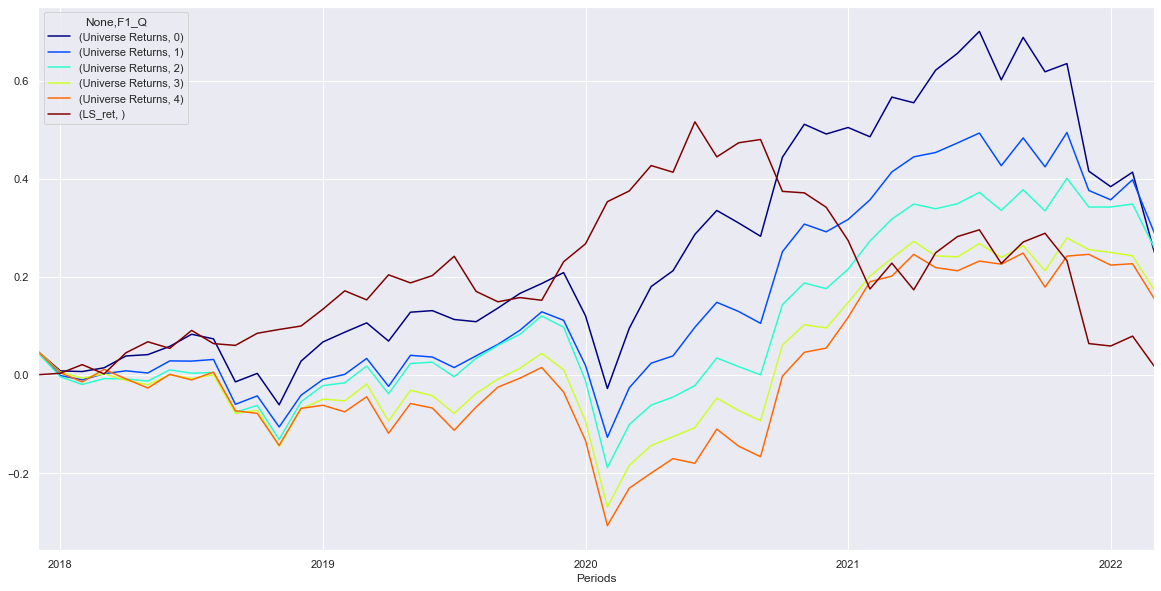

In [898]:
cumret.plot(kind = "line", figsize=(20,10), colormap = 'jet')

In [899]:
# SR 계산

df_pivoted_mean_ret_by_F1.mean()

                  F1_Q
Universe Returns  0       0.005744
                  1       0.006149
                  2       0.005794
                  3       0.004653
                  4       0.004563
LS_ret                    0.001181
dtype: float64

In [900]:
df_pivoted_mean_ret_by_F1.std()

                  F1_Q
Universe Returns  0       0.053966
                  1       0.050185
                  2       0.051958
                  3       0.056340
                  4       0.060066
LS_ret                    0.041193
dtype: float64

In [901]:
(df_pivoted_mean_ret_by_F1.mean() / df_pivoted_mean_ret_by_F1.std()).to_frame()

0
                 F1_Q          
Universe Returns 0     0.106442
                 1     0.122527
                 2     0.111512
                 3     0.082595
                 4     0.075973
LS_ret                 0.028666

----------

In [902]:
# 시총 가중평균 분위별 수익률

# 구간별 F1_Q 별 시총 비중

df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q
0,Aflac Incorporated,2017-12-29,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,3
1,Aflac Incorporated,2018-01-31,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,3
2,Aflac Incorporated,2018-02-28,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,3
3,Aflac Incorporated,2018-03-30,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,3
4,Aflac Incorporated,2018-04-30,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,2020-01-31,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,4
83923,Flex Ltd.,2020-02-28,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,4
83924,Flex Ltd.,2020-03-31,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,4
83925,Flex Ltd.,2020-04-30,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,4


In [903]:
MCAP_F1_Q_sum = df.groupby(['Periods', 'F1_Q'])['MCAP_USD'].sum().to_frame('MCAP_F1_Q_sum')
MCAP_F1_Q_sum

MCAP_F1_Q_sum
Periods    F1_Q               
2017-12-29 0      1.190649e+07
           1      1.153727e+07
           2      8.992702e+06
           3      8.538511e+06
           4      7.739210e+06
...                        ...
2022-03-31 0      2.297595e+07
           1      1.367152e+07
           2      1.374478e+07
           3      1.072659e+07
           4      8.854373e+06

[260 rows x 1 columns]

In [904]:
df = pd.merge(df, MCAP_F1_Q_sum, on = ['Periods', 'F1_Q'], how = 'left')
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q,MCAP_F1_Q_sum
0,Aflac Incorporated,2017-12-29,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,3,8.538511e+06
1,Aflac Incorporated,2018-01-31,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,3,8.964834e+06
2,Aflac Incorporated,2018-02-28,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,3,8.431366e+06
3,Aflac Incorporated,2018-03-30,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,3,8.336484e+06
4,Aflac Incorporated,2018-04-30,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,3,8.537250e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,2020-01-31,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,4,7.677483e+06
83923,Flex Ltd.,2020-02-28,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,4,7.027775e+06
83924,Flex Ltd.,2020-03-31,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,4,5.735550e+06
83925,Flex Ltd.,2020-04-30,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,4,6.020521e+06


In [905]:
df['MCAP_wt_by_F1_Q'] = df['MCAP_USD'] / df['MCAP_F1_Q_sum']
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q,MCAP_F1_Q_sum,MCAP_wt_by_F1_Q
0,Aflac Incorporated,2017-12-29,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,3,8.538511e+06,0.004014
1,Aflac Incorporated,2018-01-31,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,3,8.964834e+06,0.003841
2,Aflac Incorporated,2018-02-28,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,3,8.431366e+06,0.004108
3,Aflac Incorporated,2018-03-30,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,3,8.336484e+06,0.004091
4,Aflac Incorporated,2018-04-30,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,3,8.537250e+06,0.004132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,2020-01-31,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,4,7.677483e+06,0.000871
83923,Flex Ltd.,2020-02-28,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,4,7.027775e+06,0.000797
83924,Flex Ltd.,2020-03-31,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,4,5.735550e+06,0.000736
83925,Flex Ltd.,2020-04-30,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,4,6.020521e+06,0.000817


In [906]:
df.groupby(['Periods'])['MCAP_wt_by_F1_Q'].sum()

Periods
2017-12-29    5.0
2018-01-31    5.0
2018-02-28    5.0
2018-03-30    5.0
2018-04-30    5.0
2018-05-31    5.0
2018-06-29    5.0
2018-07-31    5.0
2018-08-31    5.0
2018-09-28    5.0
2018-10-31    5.0
2018-11-30    5.0
2018-12-31    5.0
2019-01-31    5.0
2019-02-28    5.0
2019-03-29    5.0
2019-04-30    5.0
2019-05-31    5.0
2019-06-28    5.0
2019-07-31    5.0
2019-08-30    5.0
2019-09-30    5.0
2019-10-31    5.0
2019-11-29    5.0
2019-12-31    5.0
2020-01-31    5.0
2020-02-28    5.0
2020-03-31    5.0
2020-04-30    5.0
2020-05-29    5.0
2020-06-30    5.0
2020-07-31    5.0
2020-08-31    5.0
2020-09-30    5.0
2020-10-30    5.0
2020-11-30    5.0
2020-12-31    5.0
2021-01-29    5.0
2021-02-26    5.0
2021-03-31    5.0
2021-04-30    5.0
2021-05-31    5.0
2021-06-30    5.0
2021-07-30    5.0
2021-08-31    5.0
2021-09-30    5.0
2021-10-29    5.0
2021-11-30    5.0
2021-12-31    5.0
2022-01-31    5.0
2022-02-28    5.0
2022-03-31    5.0
Name: MCAP_wt_by_F1_Q, dtype: float64

In [907]:
df['weighted_return'] = df['Universe Returns'] * df['MCAP_wt_by_F1_Q']
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q,MCAP_F1_Q_sum,MCAP_wt_by_F1_Q,weighted_return
0,Aflac Incorporated,2017-12-29,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,3,8.538511e+06,0.004014,0.001921
1,Aflac Incorporated,2018-01-31,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,3,8.964834e+06,0.003841,0.005226
2,Aflac Incorporated,2018-02-28,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,3,8.431366e+06,0.004108,-0.006286
3,Aflac Incorporated,2018-03-30,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,3,8.336484e+06,0.004091,0.016921
4,Aflac Incorporated,2018-04-30,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,3,8.537250e+06,0.004132,-0.002267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,2020-01-31,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,4,7.677483e+06,0.000871,-0.013506
83923,Flex Ltd.,2020-02-28,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,4,7.027775e+06,0.000797,-0.019614
83924,Flex Ltd.,2020-03-31,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,4,5.735550e+06,0.000736,0.012170
83925,Flex Ltd.,2020-04-30,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,4,6.020521e+06,0.000817,-0.000419


In [908]:
df_pivoted_wt_ret_by_F1 = pd.pivot_table(df, index = ['Periods'], columns = ['F1_Q'], values = ['weighted_return'], aggfunc = 'sum')
df_pivoted_wt_ret_by_F1 = df_pivoted_wt_ret_by_F1/100
df_pivoted_wt_ret_by_F1[:5]

weighted_return                                        
F1_Q                     0         1         2         3         4
Periods                                                           
2017-12-29        0.067084  0.052341  0.047894  0.051710  0.050984
2018-01-31       -0.036000 -0.030396 -0.047256 -0.055271 -0.049780
2018-02-28       -0.024319 -0.016985 -0.022200 -0.020906 -0.016758
2018-03-30        0.005012  0.009942  0.002690  0.014825  0.037095
2018-04-30        0.035431  0.015521  0.001975 -0.016212 -0.027337

In [909]:
wt_cumret = (1 + df_pivoted_wt_ret_by_F1).cumprod() -1
wt_cumret[:5]

weighted_return                                        
F1_Q                     0         1         2         3         4
Periods                                                           
2017-12-29        0.067084  0.052341  0.047894  0.051710  0.050984
2018-01-31        0.028669  0.020354 -0.001625 -0.006418 -0.001334
2018-02-28        0.003652  0.003023 -0.023789 -0.027190 -0.018070
2018-03-30        0.008683  0.012995 -0.021163 -0.012768  0.018355
2018-04-30        0.044422  0.028718 -0.019230 -0.028773 -0.009484

<AxesSubplot:xlabel='Periods'>

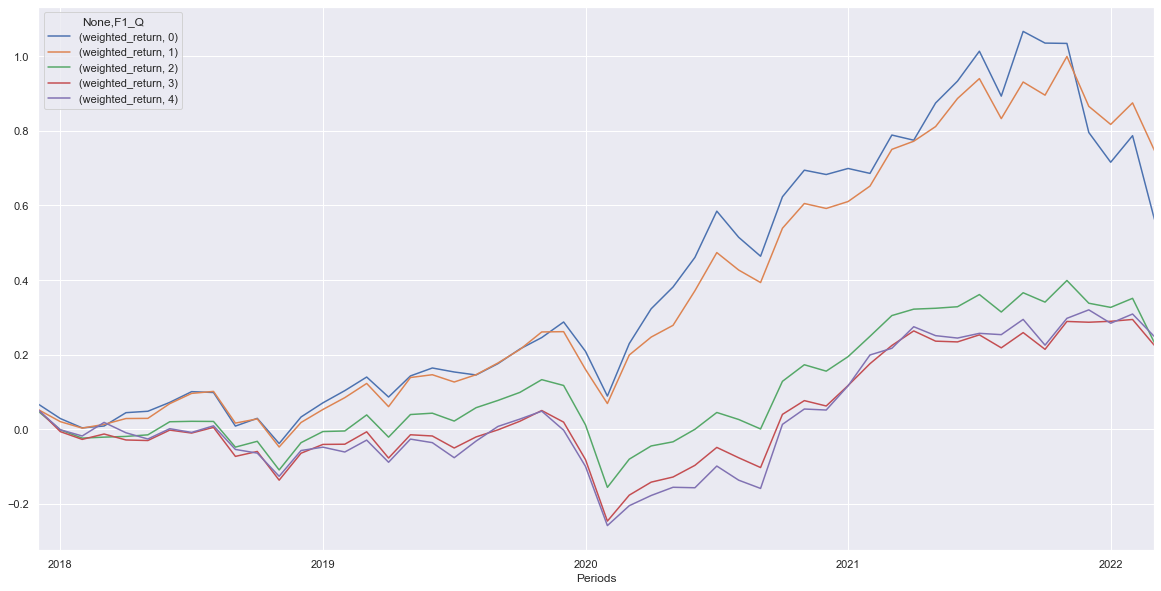

In [910]:
wt_cumret.plot(kind = 'line', figsize = (20,10))

In [911]:
# F1_Q = 1의 국가 분포 by wt.

df_F1_0 = df[df['F1_Q'] == 0]
df_F1_0_ctr_dist = df_F1_0.groupby(['Periods', 'Country'])['MCAP_wt_by_F1_Q'].sum().to_frame('ctr_dist').reset_index()
df_F1_0_ctr_dist

,Periods,Country,ctr_dist
0,2017-12-29,Australia,0.019539
1,2017-12-29,Canada,0.016952
2,2017-12-29,Denmark,0.016977
3,2017-12-29,Finland,0.000446
4,2017-12-29,France,0.020428
...,...,...,...
1017,2022-03-31,Spain,0.003826
1018,2022-03-31,Sweden,0.007568
1019,2022-03-31,Switzerland,0.008972
1020,2022-03-31,United Kingdom,0.003356


In [912]:
df_F1_0_ctr_dist_pivot = df_F1_0_ctr_dist.pivot(index = 'Periods', columns = 'Country', values = 'ctr_dist')
df_F1_0_ctr_dist_pivot[:5]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2017-12-29,0.019539,NaN,NaN,0.016952,0.016977,0.000446,0.020428,0.021922,0.044421,0.000847,...,0.006316,0.001270,NaN,NaN,0.007339,0.006813,0.001443,0.024999,0.040485,0.723139
2018-01-31,0.019519,NaN,NaN,0.015535,0.016155,0.000452,0.019511,0.021104,0.042548,0.000768,...,0.006854,0.001221,NaN,NaN,0.010185,0.007450,0.003078,0.025099,0.035573,0.726738
2018-02-28,0.019463,NaN,NaN,0.015490,0.016412,NaN,0.020301,0.021201,0.044492,0.000822,...,0.011174,0.001264,NaN,NaN,0.010918,0.007502,0.006253,0.006498,0.029215,0.737540
2018-03-30,0.019816,NaN,NaN,0.015858,0.017274,NaN,0.023902,0.020763,0.040564,0.000742,...,0.011255,0.001246,NaN,NaN,0.010981,0.007659,0.004925,0.007543,0.035047,0.729462
2018-04-30,0.020558,NaN,NaN,0.017578,0.016158,NaN,0.031630,0.021174,0.042376,NaN,...,0.007346,0.001186,NaN,NaN,0.008340,0.007550,0.006745,0.011932,0.029316,0.729703


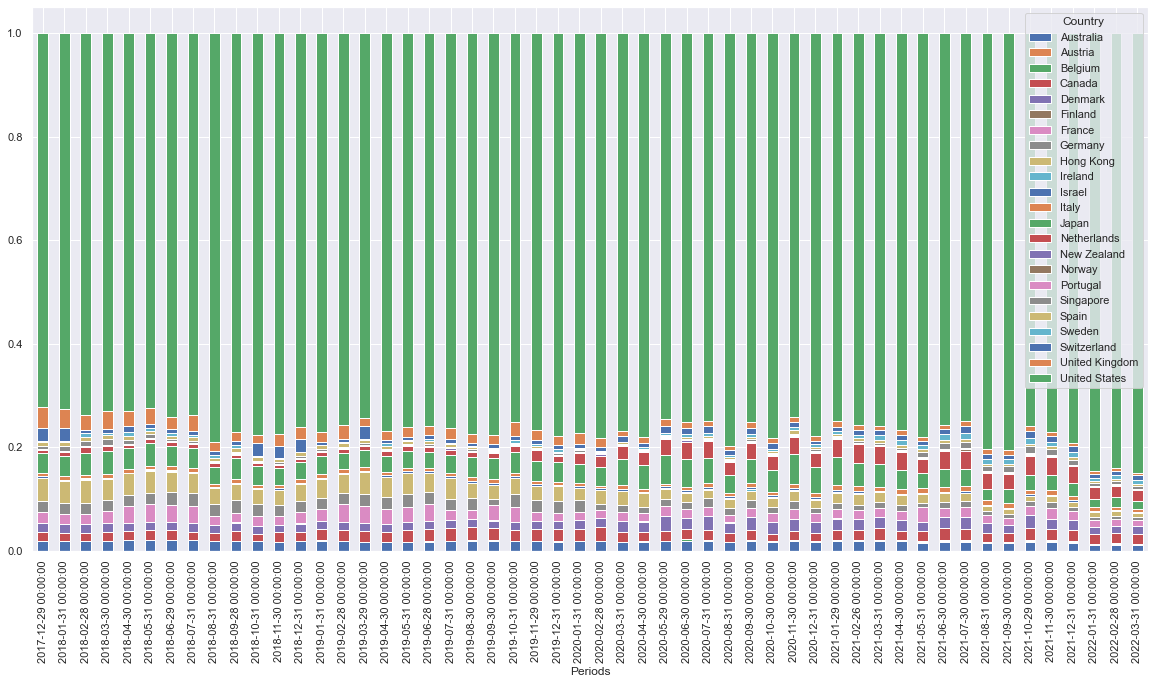

In [913]:
df_F1_0_ctr_dist_pivot.plot(kind = 'bar', stacked = True, figsize = (20,10))

# x-axis 날짜포맷 변경 방법?

from matplotlib.dates import DateFormatter

myfmt = DateFormatter("%Y")
ax.xaxis.set_major_formatter(myfmt)

In [914]:
# F1_Q = 1의 섹터 분포 by wt.

df_F1_0 = df[df['F1_Q'] == 0]
df_F1_0_sct_dist = df_F1_0.groupby(['Periods', 'Sector'])['MCAP_wt_by_F1_Q'].sum().to_frame('sct_dist').reset_index()
df_F1_0_sct_dist

,Periods,Sector,sct_dist
0,2017-12-29,Communication Services,0.182931
1,2017-12-29,Consumer Discretionary,0.054164
2,2017-12-29,Consumer Staples,0.078244
3,2017-12-29,Energy,0.028047
4,2017-12-29,Financials,0.069367
...,...,...,...
564,2022-03-31,Industrials,0.034800
565,2022-03-31,Information Technology,0.448220
566,2022-03-31,Materials,0.006154
567,2022-03-31,Real Estate,0.063851


In [915]:
df_F1_0_sct_dist_pivot = df_F1_0_sct_dist.pivot(index = 'Periods', columns = 'Sector', values = 'sct_dist')
df_F1_0_sct_dist_pivot[:5]

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Periods,,,,,,,,,,,
2017-12-29,0.182931,0.054164,0.078244,0.028047,0.069367,0.166677,0.052439,0.248120,0.009578,0.096835,0.013597
2018-01-31,0.190575,0.057122,0.074365,0.026759,0.073982,0.168282,0.051048,0.254630,0.008197,0.087067,0.007973
2018-02-28,0.194101,0.061792,0.067752,0.017987,0.081653,0.154899,0.042659,0.277676,0.008337,0.085884,0.007260
2018-03-30,0.184111,0.055933,0.077486,0.019439,0.078291,0.153685,0.046333,0.273814,0.008197,0.087483,0.015227
2018-04-30,0.180187,0.063126,0.075057,0.027704,0.078292,0.139122,0.045786,0.281104,0.010317,0.085765,0.013539


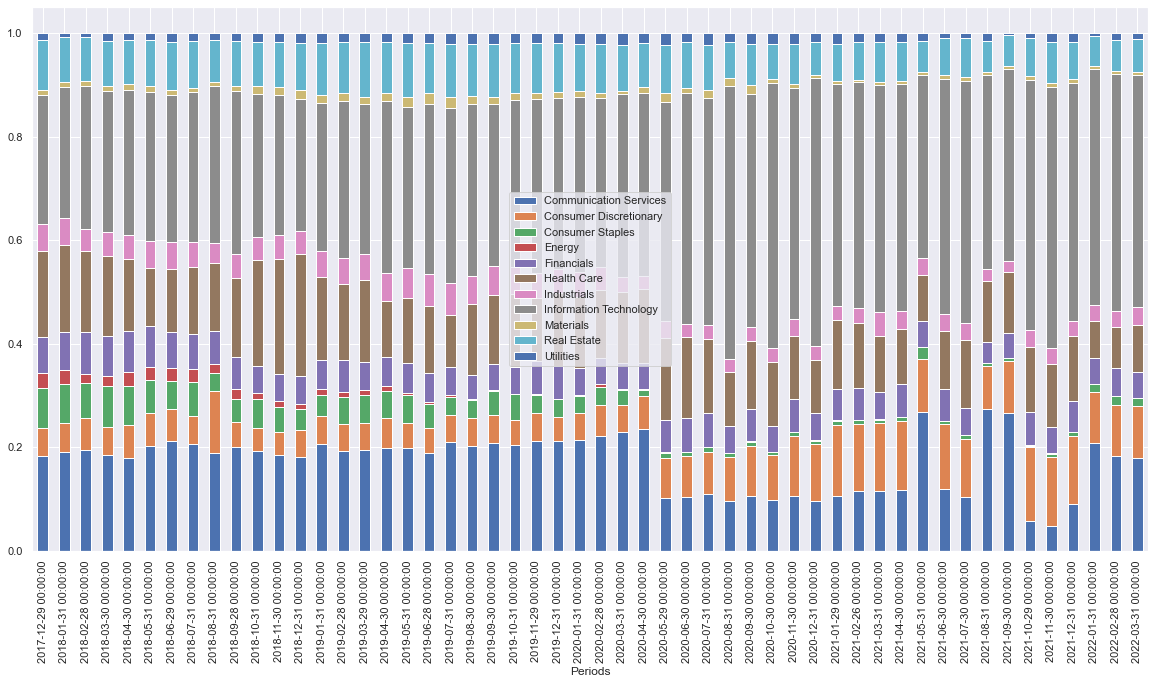

In [916]:
# sct_dist 기준으로 정렬 가능? (legend도 동일한 순서로 표시?)

df_F1_0_sct_dist_pivot.plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.legend()

In [917]:
# F1_Q = 1의 사이즈별 분포 by wt.

df_F1_0_size_dist = df_F1_0.groupby(['Periods', 'MCAP_Class'])['MCAP_wt_by_F1_Q'].sum().to_frame('size_dist').reset_index()
df_F1_0_size_dist

,Periods,MCAP_Class,size_dist
0,2017-12-29,LARGE,0.223911
1,2017-12-29,MEGA,0.725580
2,2017-12-29,SMID,0.050509
3,2017-12-29,nan,0.000000
4,2018-01-31,LARGE,0.218532
...,...,...,...
203,2022-02-28,nan,0.000000
204,2022-03-31,LARGE,0.166588
205,2022-03-31,MEGA,0.802146
206,2022-03-31,SMID,0.031266


In [918]:
df_F1_0_size_dist_pivot = df_F1_0_size_dist.pivot(index = 'Periods', columns = 'MCAP_Class', values = 'size_dist')
df_F1_0_size_dist_pivot[:5]

MCAP_Class,LARGE,MEGA,SMID,nan
Periods,,,,
2017-12-29,0.223911,0.725580,0.050509,0.0
2018-01-31,0.218532,0.731198,0.050270,0.0
2018-02-28,0.224976,0.724003,0.051021,0.0
2018-03-30,0.228930,0.719670,0.051400,0.0
2018-04-30,0.227641,0.721415,0.050943,0.0


<AxesSubplot:xlabel='Periods'>

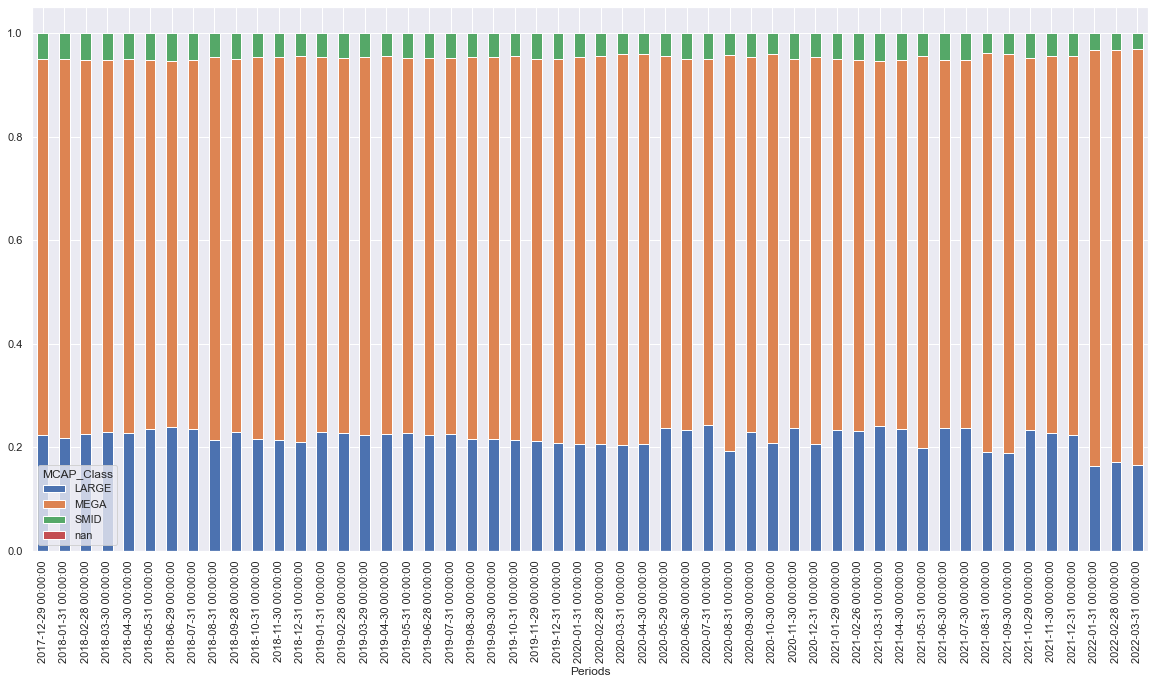

In [919]:
df_F1_0_size_dist_pivot.plot(kind = 'bar', stacked = True, figsize = (20,10))

In [920]:
df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3,MCAP_USD_ctr_pct_rank,MCAP_Class,F1_filled,F1_filled_2,Periods_MCAP_Class,F1_Q,MCAP_F1_Q_sum,MCAP_wt_by_F1_Q,weighted_return
0,Aflac Incorporated,2017-12-29,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN,0.281646,LARGE,0.647660,0.647660,12/29/2017 LARGE,3,8.538511e+06,0.004014,0.001921
1,Aflac Incorporated,2018-01-31,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN,0.287975,LARGE,0.644576,0.644576,1/31/2018 LARGE,3,8.964834e+06,0.003841,0.005226
2,Aflac Incorporated,2018-02-28,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN,0.273734,LARGE,0.640912,0.640912,2/28/2018 LARGE,3,8.431366e+06,0.004108,-0.006286
3,Aflac Incorporated,2018-03-30,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN,0.282092,LARGE,0.635302,0.635302,3/30/2018 LARGE,3,8.336484e+06,0.004091,0.016921
4,Aflac Incorporated,2018-04-30,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN,0.266244,LARGE,0.614165,0.614165,4/30/2018 LARGE,3,8.537250e+06,0.004132,-0.002267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,2020-01-31,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272,0.952830,SMID,3.732880,3.732880,1/31/2020 SMID,4,7.677483e+06,0.000871,-0.013506
83923,Flex Ltd.,2020-02-28,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201,0.959055,SMID,4.456142,4.456142,2/28/2020 SMID,4,7.027775e+06,0.000797,-0.019614
83924,Flex Ltd.,2020-03-31,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201,0.919685,SMID,5.911372,5.911372,3/31/2020 SMID,4,5.735550e+06,0.000736,0.012170
83925,Flex Ltd.,2020-04-30,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201,0.930709,SMID,5.072514,5.072514,4/30/2020 SMID,4,6.020521e+06,0.000817,-0.000419


In [921]:
# neutralize 전 값으로 비교

df_unneu_F1_0 = df[df['F1_Q'] == 0]
df_unneu_F1_0 = df_unneu_F1_0.groupby(['Periods', 'Country'])['MCAP_USD'].sum().to_frame('unneutralized_size_dist').reset_index()
df_unneu_F1_0

,Periods,Country,unneutralized_size_dist
0,2017-12-29,Australia,2.326425e+05
1,2017-12-29,Canada,2.018374e+05
2,2017-12-29,Denmark,2.021370e+05
3,2017-12-29,Finland,5.315992e+03
4,2017-12-29,France,2.432315e+05
...,...,...,...
1017,2022-03-31,Spain,8.791210e+04
1018,2022-03-31,Sweden,1.738768e+05
1019,2022-03-31,Switzerland,2.061437e+05
1020,2022-03-31,United Kingdom,7.711565e+04


In [922]:
df_unneu_F1_0_pivot = df_unneu_F1_0.pivot(index = 'Periods', columns = 'Country', values = 'unneutralized_size_dist')
df_unneu_F1_0_pivot[:5]

Country,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong,Ireland,...,Netherlands,New Zealand,Norway,Portugal,Singapore,Spain,Sweden,Switzerland,United Kingdom,United States
Periods,,,,,,,,,,,,,,,,,,,,,
2017-12-29,232642.473056,NaN,NaN,201837.404002,202136.981330,5315.992044,243231.467845,261015.817501,528892.576865,10081.057960,...,75202.623030,15116.140789,NaN,NaN,87385.049888,81113.816806,17181.514455,297646.929945,482031.798274,8.610049e+06
2018-01-31,249825.252598,NaN,NaN,198828.381799,206768.254229,5790.250920,249720.406049,270100.164629,544562.539663,9831.981635,...,87719.534480,15631.850991,NaN,NaN,130357.338608,95345.816604,39392.939396,321231.921350,455288.760695,9.301379e+06
2018-02-28,233027.028765,NaN,NaN,185463.106838,196493.483502,NaN,243064.526049,253832.921223,532689.002217,9837.476662,...,133777.920938,15131.072862,NaN,NaN,130718.419716,89820.485172,74863.174090,77800.134766,349778.982861,8.830402e+06
2018-03-30,231444.128721,NaN,NaN,185214.504192,201755.407100,NaN,279166.192814,242501.563542,473776.890883,8664.073014,...,131455.262399,14548.396485,NaN,NaN,128261.161067,89459.344064,57522.295815,88099.489028,409342.602798,8.519942e+06
2018-04-30,247448.883389,NaN,NaN,211575.445616,194483.743040,NaN,380708.701129,254863.687476,510060.436350,NaN,...,88421.104301,14272.809689,NaN,NaN,100384.227595,90876.688097,81182.540138,143614.154883,352857.817362,8.783023e+06


<AxesSubplot:xlabel='Periods'>

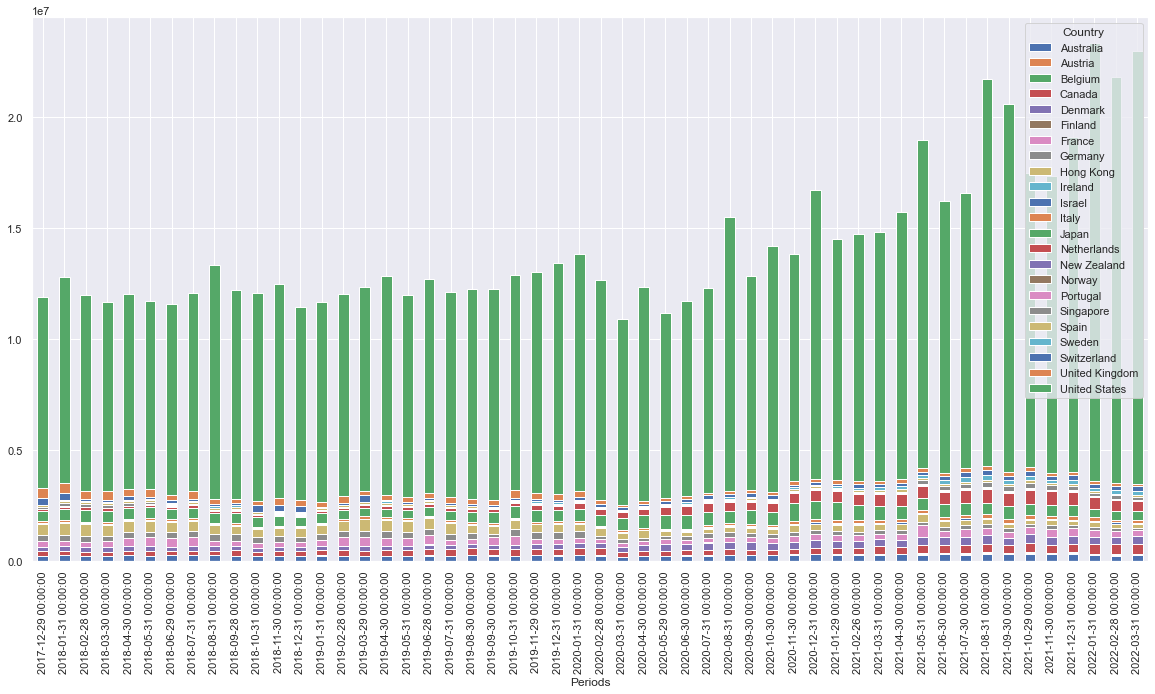

In [923]:
df_unneu_F1_0_pivot.plot(kind = 'bar', stacked = True, figsize = (20,10))

-------

In [980]:
# 섹터 x [F1, F2] 메트릭스
# 메트릭스 내 각 셀의 라인차트는 시간의 흐름에 따른 특정 섹터 내 F1 평균값 추이
# 섹터 대신 특정 팩터 분위 사용 가능: Valuation과 같은 평균값을 사용하여 분위별 상대적 가격 및 추이 확인

df

,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,F1,F2,F3
0,Aflac Incorporated,12/29/2017,AFL-US,0.478470,North America,United States,Financials,34274.138240,0.647660,2.050581,NaN
1,Aflac Incorporated,1/31/2018,AFL-US,1.360536,North America,United States,Financials,34438.128620,0.644576,2.040816,NaN
2,Aflac Incorporated,2/28/2018,AFL-US,-1.530153,North America,United States,Financials,34635.025210,0.640912,2.340234,NaN
3,Aflac Incorporated,3/30/2018,AFL-US,4.136205,North America,United States,Financials,34105.056070,0.635302,2.376600,NaN
4,Aflac Incorporated,4/30/2018,AFL-US,-0.548601,North America,United States,Financials,35278.792380,0.614165,2.282203,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83922,Flex Ltd.,1/31/2020,FLEX-US,-15.513307,North America,United States,Information Technology,6684.250189,3.732880,0.000000,5.862272
83923,Flex Ltd.,2/28/2020,FLEX-US,-24.617458,North America,United States,Information Technology,5599.350996,4.456142,0.000000,5.809201
83924,Flex Ltd.,3/31/2020,FLEX-US,16.537321,North America,United States,Information Technology,4220.933037,5.911372,0.000000,5.809201
83925,Flex Ltd.,4/30/2020,FLEX-US,-0.512296,North America,United States,Information Technology,4918.962078,5.072514,0.000000,5.809201


In [1006]:
# 평균값을 계산하고 싶은 칼럼
list = ['Universe Returns', 'F1', 'F2']

# 평균값 계산, 날짜 포맷 및 정렬
df_n = df.groupby(['Periods', 'Sector'])[list].mean().reset_index()
df_n['Periods'] = pd.to_datetime(df['Periods'], format='%m/%d/%Y')
df_n.sort_values(by='Periods', ascending=False)
df_n[:5]

,Periods,Sector,Universe Returns,F1,F2
0,2017-12-29,Communication Services,4.383498,0.535175,2.162282
1,2018-01-31,Consumer Discretionary,5.443881,0.781626,1.122938
2,2018-02-28,Consumer Staples,-2.057750,0.980929,2.228865
3,2018-03-30,Energy,15.235984,1.147807,4.339371
4,2018-04-30,Financials,8.628933,0.808869,2.718050


In [1007]:
# melt로 list에 있는 칼럼을 Factors와 mean 두개의 칼럼으로 변환
# id_vars는 그대로 유지하고싶은 칼럼, value_vars는 변환하고 싶은 칼럼, var_name은 변환하고 싶은 칼럼헤드의 칼럼헤드, value_name은 변환하고 싶은 데이터의 칼럼헤드
df_n_melt = pd.melt(df_n, id_vars=['Periods', 'Sector'], value_vars=list, var_name='Factors', value_name='mean')
df_n_melt

,Periods,Sector,Factors,mean
0,2017-12-29,Communication Services,Universe Returns,4.383498
1,2018-01-31,Consumer Discretionary,Universe Returns,5.443881
2,2018-02-28,Consumer Staples,Universe Returns,-2.057750
3,2018-03-30,Energy,Universe Returns,15.235984
4,2018-04-30,Financials,Universe Returns,8.628933
...,...,...,...,...
1711,2018-04-30,Industrials,F2,1.546600
1712,2018-05-31,Information Technology,F2,0.812422
1713,2018-06-29,Materials,F2,2.832660
1714,2018-07-31,Real Estate,F2,3.249643


In [1008]:
# 다시 한번 날짜 포맷, 정렬 확인
df_n_melt['Periods'].unique()

array(['2017-12-29T00:00:00.000000000', '2018-01-31T00:00:00.000000000',
       '2018-02-28T00:00:00.000000000', '2018-03-30T00:00:00.000000000',
       '2018-04-30T00:00:00.000000000', '2018-05-31T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-08-31T00:00:00.000000000', '2018-09-28T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-28T00:00:00.000000000', '2019-03-29T00:00:00.000000000',
       '2019-04-30T00:00:00.000000000', '2019-05-31T00:00:00.000000000',
       '2019-06-28T00:00:00.000000000', '2019-07-31T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-09-30T00:00:00.000000000',
       '2019-10-31T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-03-31

[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 18078. 18262. 18444. 18628. 18809. 18993.]
[17532. 17713. 17897. 180

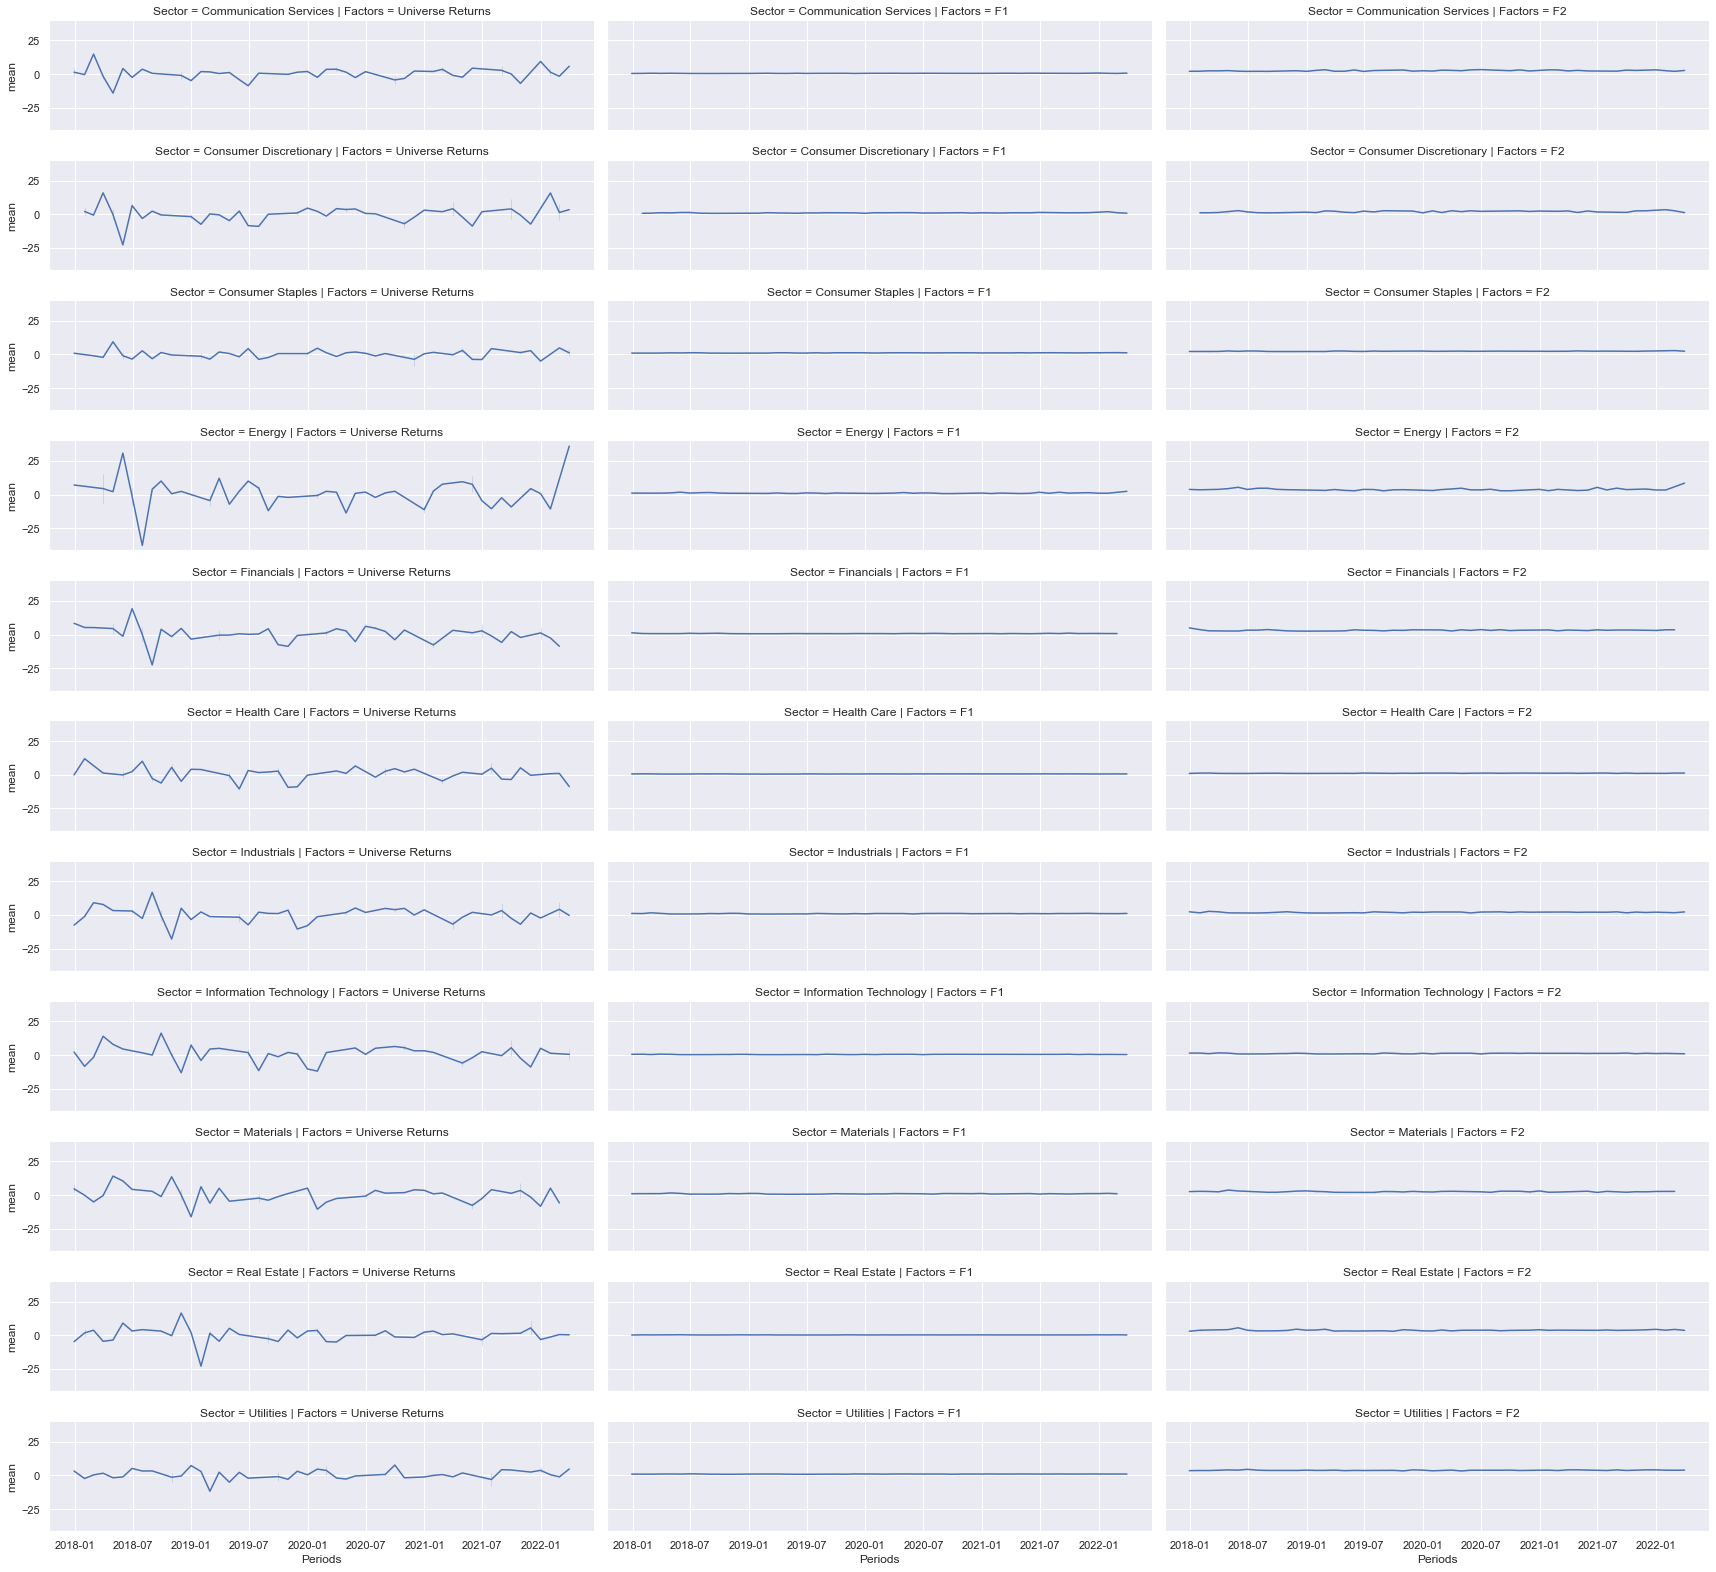

In [1119]:
# 년도-월만 표시
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

# FacetGrid로 전체 행렬 정의
# .map으로 각 메트릭스 셀 내의 데이터 정의
g = sns.FacetGrid(df_n_melt, col="Factors", row="Sector", height=2, aspect=4)
g.map(sns.lineplot, "Periods", "mean")

